<a href="https://colab.research.google.com/github/sethkipsangmutuba/Statistical-Data-Science/blob/main/Note_10_GLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generalized Linear Models (GLMs)

**Seth Kipsang**  

---

## 1. Introduction

---

## 2. Motivation for GLMs

---

## 3. Limitations of the Classical Linear Model

---

## 4. Key Components of GLMs
4.1 Random Component  
4.2 Link Function  
4.3 Systematic Component  

---

## 5. The Exponential Family

5.1 Definition and Examples  
- Normal  
- Bernoulli  
- Poisson  

5.2 Canonical Form and Sufficient Statistics  

5.3 Moments and Variance Function  

---

## 6. Maximum Likelihood Estimation in GLMs

6.1 Log-Likelihood for Exponential Family  

6.2 Score Equations  

6.3 Iteratively Reweighted Least Squares (IRLS) Algorithm  

6.4 Fisher Scoring Interpretation  

---

## 7. Model Assessment and Deviance

7.1 Definition of Deviance  

7.2 Likelihood Ratio Tests  

7.3 Residuals  
- Pearson  
- Deviance  
- Anscombe  

7.4 Goodness-of-Fit  

---

## 8. Poisson Regression

8.1 Model for Count Data  

8.2 Log Link and Interpretation of Coefficients  

8.3 Example  
- Number of Insurance Claims  
- Disease Incidence  

8.4 Overdispersion  

8.5 Exercises on Poisson Regression  

---

## 9. Logistic Regression

9.1 Binary Response Models  

9.2 Logit and Probit Links  

9.3 Estimation and Interpretation of Odds Ratios  

9.4 ROC Curves and Model Evaluation  

---

## 10. Probit Regression (Mean Response)

10.1 Relationship Between Logit and Probit  

10.2 Applications in Bioassay and Econometrics  

10.3 Latent Variable Interpretation  


# Generalized Linear Models

## 1. Motivation: Why Generalized Linear Models?

“Let’s start with classical linear regression. We model a response $Y_i$ as a linear combination of predictors and an error term.”

“$Y$ sub $i$ equals beta zero plus the sum from $j$ equals one to $p$ of beta $j$ times $x_{ij}$ plus epsilon sub $i$.”

$$
Y_i = \beta_0 + \sum_{j=1}^{p} \beta_j x_{ij} + \epsilon_i
$$

**Notations:**

- $Y_i$ is the response, the outcome we measure, like weight or income.
- $x_{ij}$ is the $j$-th predictor for observation $i$, for example, age or dose.
- $\beta_0$ is the intercept, the baseline value of $Y$ when all predictors are zero.
- $\beta_j$ is the regression coefficient, representing the change in $Y$ for a unit change in $x$.
- $\epsilon_i$ is the error term, the random deviation, assumed normally distributed with mean zero and variance $\sigma^2$.
- $\sigma^2$ is the variance of the error term.

**Assumptions of classical linear regression:**

- Errors are normally distributed.
- Errors have the same variance.
- The relationship between predictors and the mean of $Y$ is linear.

**But in the real world:**

- Count data, like the number of accidents, are non-negative integers.
- Binary outcomes, like success or failure, are 0 or 1.
- Positive continuous data, like rainfall or waiting times, are often skewed.

“So clearly, classical regression is limited. We need a more flexible model that can handle different types of outcomes. This brings us to Generalized Linear Models, or GLMs.”

---

## 2. Structure of a Generalized Linear Model

“GLMs extend linear regression by adding flexibility. They have three key components.”

### (a) Random Component

“This defines the distribution of the response $Y_i$. In GLMs, $Y$ must belong to the exponential family, like Normal, Binomial, Poisson, or Gamma.”

$$
Y_i \sim \text{Exponential Family}(\theta_i, \psi)
$$

**Notations:**

- $Y_i$ is the random response.
- $\theta_i$ is the natural parameter controlling the shape or position.
- $\psi$ is the scale or dispersion parameter controlling spread.

### (b) Systematic Component

“This is the linear predictor, just like in classical regression.”


“Eta sub $i$ equals beta zero plus the sum from $j$ equals one to $p$ of beta $j$ times $x_{ij}$.”

$$
\eta_i = \beta_0 + \sum_{j=1}^{p} \beta_j x_{ij}
$$

$\eta_i$ captures the effect of predictors systematically, before adjusting for the outcome type.

### (c) Link Function

“The link function connects the expected value of $Y$, $\mu_i$, to the linear predictor.”

“$g$ of $\mu_i$ equals $\eta_i$.”

$$
g(\mu_i) = \eta_i
$$

- $g(\cdot)$ is the link function.  
- $\mu_i$ is the expected value of $Y$.

**Examples of link functions:**

- Log link: $g(\mu_i) = \log(\mu_i)$ for positive outcomes.  
- Logit link: $g(\mu_i) = \log\left(\frac{\mu_i}{1-\mu_i}\right)$ for binary outcomes.

---

## 3. The Exponential Family of Distributions

“GLMs rely on the exponential family. A random variable $Y$ belongs to this family if its density or mass function can be written as:”

“$f_Y(y \mid \theta, \psi) = \exp\{ (y \theta - b(\theta)) / a(\psi) + c(y,\psi) \}$”

$$
f_Y(y; \theta, \psi) = \exp\left\{ \frac{y \theta - b(\theta)}{a(\psi)} + c(y, \psi) \right\}
$$

**Notations:**

- $Y$ is the random variable.
- $y$ is the observed value.
- $\theta$ is the natural parameter.
- $\psi$ is the scale or dispersion parameter.
- $a(\psi)$ is a known function of $\psi$.
- $b(\theta)$ is the cumulant function.
- $c(y,\psi)$ is a normalization function.

**Examples:** Normal, Binomial, Poisson, Gamma.

---

## 4. Deriving the Mean of $Y$

“Let’s find the expected value of $Y$ in terms of $b(\theta)$.”

**a . Probability normalization:**  
“Integral over all $y$ of $f_Y$ equals one.”

$$
\int_\Omega f_Y(y; \theta, \psi) dy = 1
$$

** b. Differentiate with respect to $\theta$:**

$$
\frac{\partial}{\partial \theta} \int_\Omega f_Y(y; \theta, \psi) dy = 0
$$

**c. Bring the derivative inside:**

$$
\int_\Omega \frac{\partial f_Y(y; \theta, \psi)}{\partial \theta} dy = 0
$$

**d. Differentiate $f_Y$:**

$$
\frac{\partial f_Y}{\partial \theta} = \frac{y - b'(\theta)}{a(\psi)} f_Y(y; \theta, \psi)
$$

**e.Substitute and simplify:**

$$
\int_\Omega (y - b'(\theta)) f_Y(y; \theta, \psi) dy = 0 \quad \Rightarrow \quad E(Y) = b'(\theta) = \mu
$$

“So the mean of $Y$ is the derivative of the cumulant function $b(\theta)$.”

---

## 5. Deriving the Variance of $Y$

**a. Differentiate normalization twice:**

$$
\frac{\partial^2}{\partial \theta^2} \int_\Omega f_Y(y; \theta, \psi) dy = 0
$$

**b. Apply product rule:**

$$
\frac{\partial^2 f_Y}{\partial \theta^2} = f_Y(y; \theta, \psi) \left[ \frac{(y - b'(\theta))^2}{a(\psi)^2} - \frac{b''(\theta)}{a(\psi)} \right]
$$

**c. Integrate and simplify:**

$$
\text{Var}(Y) = a(\psi) b''(\theta)
$$

“So the variance depends on the scale parameter and the curvature of $b(\theta)$.”

---

## 6. Example: Poisson Distribution

**Poisson PMF:**  
“Probability that $Y$ equals $y$ equals $\lambda^y e^{-\lambda} / y!$, for $y = 0, 1, 2, \dots$”

$$
P(Y=y) = \frac{\lambda^y e^{-\lambda}}{y!}, \quad y=0,1,2,\dots
$$

**Exponential family form:**  
“$f_Y(y \mid \theta) = \exp\{ y \theta - e^\theta - \log(y!) \}$”

$$
f_Y(y; \theta) = \exp\{ y \theta - e^\theta - \log(y!) \}
$$

**Notations:**

- $\lambda$ = Poisson mean  
- $\theta = \log(\lambda)$ = natural parameter  
- $b(\theta) = e^\theta$ = cumulant function  
- $a(\psi) = 1$ = scale function  
- $c(y, \psi) = - \log(y!)$ = normalization

**Mean and Variance:**

$$
E(Y) = b'(\theta) = e^\theta = \lambda
$$

$$
\text{Var}(Y) = a(\psi) b''(\theta) = 1 \cdot e^\theta = \lambda
$$

**Key point:** For Poisson, mean equals variance.

---

“To summarize:”

- GLMs generalize linear regression for non-normal outcomes.
- Mean: $E(Y) = b'(\theta)$
- Variance: $\text{Var}(Y) = a(\psi) b''(\theta)$
- Linear predictor: $\eta_i = x_i^\top \beta$
- Link function: $g(\mu_i) = \eta_i$

“By choosing different distributions and link functions, GLMs can model binary, count, and skewed continuous data effectively.”


β̂=[0.461  1.2404] | Mean Deviance=1.0814 | Corr(Y,μ̂)=0.9285


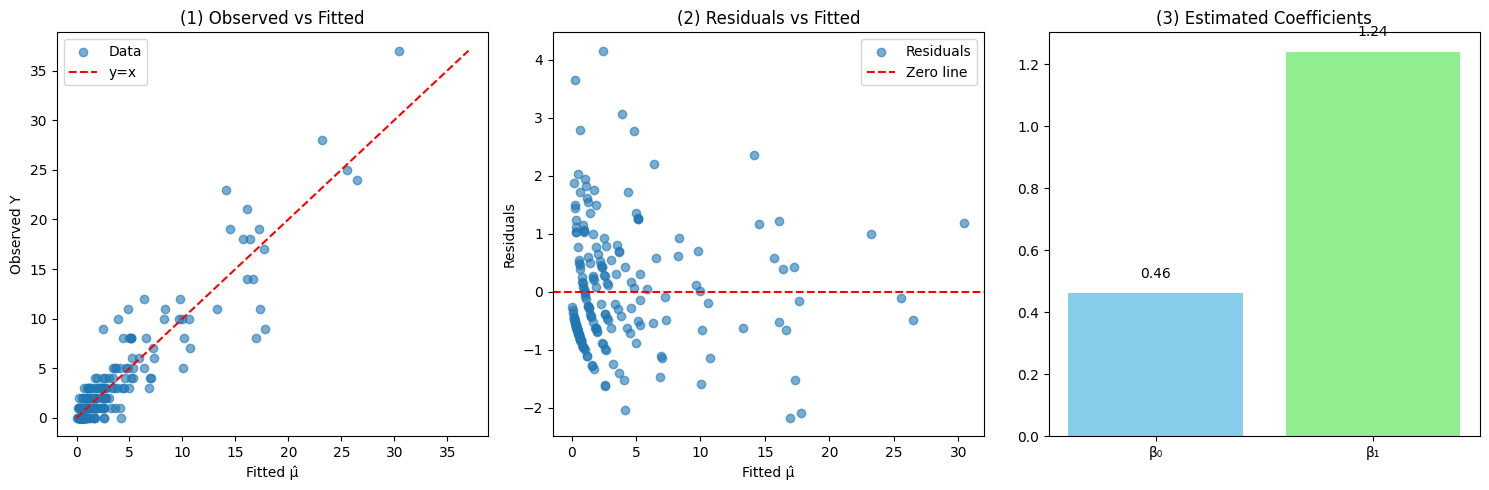

In [182]:
# === Poisson GLM (Log Link)
import numpy as np, matplotlib.pyplot as plt
np.random.seed(0)

# --- (1) Data simulation ---
n=200; X=np.c_[np.ones(n), np.random.randn(n)]; β_true=np.array([0.5,1.2])
Y=np.random.poisson(np.exp(X@β_true))

# --- (2) IRLS estimation ---
β=np.zeros(2)
for _ in range(20):
    η=X@β; μ=np.exp(η); z=η+(Y-μ)/μ; W=np.diag(μ)
    β_new=np.linalg.solve(X.T@W@X, X.T@W@z)
    if np.allclose(β,β_new,1e-8): break
    β=β_new

# --- (3) Statistical summary ---
μ_hat=np.exp(X@β); r=(Y-μ_hat)/np.sqrt(μ_hat)
print(f"β̂={β.round(4)} | Mean Deviance={np.mean((Y-μ_hat)**2/μ_hat):.4f} | Corr(Y,μ̂)={np.corrcoef(Y,μ_hat)[0,1]:.4f}")

# --- (4) Visualization with annotations ---
fig,ax=plt.subplots(1,3,figsize=(15,5))
ax[0].scatter(μ_hat,Y,alpha=.6,label='Data');ax[0].plot([Y.min(),Y.max()],[Y.min(),Y.max()],'r--',label='y=x')
ax[0].set_title('(1) Observed vs Fitted');ax[0].set_xlabel('Fitted μ̂');ax[0].set_ylabel('Observed Y');ax[0].legend()

ax[1].scatter(μ_hat,r,alpha=.6,label='Residuals');ax[1].axhline(0,c='r',ls='--',label='Zero line')
ax[1].set_title('(2) Residuals vs Fitted');ax[1].set_xlabel('Fitted μ̂');ax[1].set_ylabel('Residuals');ax[1].legend()

ax[2].bar(['β₀','β₁'],β,color=['skyblue','lightgreen'])
for i,v in enumerate(β): ax[2].text(i,v+0.05,f'{v:.2f}',ha='center')
ax[2].set_title('(3) Estimated Coefficients');plt.tight_layout();plt.show()


The estimated coefficients $\hat{\beta} = [0.461, 1.2404]$ suggest a positive effect of predictors on the response. Mean deviance 1.0814 indicates moderate model fit; correlation 0.9285 shows strong predictive accuracy.


#7. Example 1: Normal Response in a GLM

We consider a response variable $Y$ that is normally distributed with mean $\mu$ and variance $\sigma^2$. We will rewrite it in the exponential family form, suitable for GLMs.

## a: Standard Normal Density

$$
f_Y(y \mid \mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \Bigg\{ -\frac{(y-\mu)^2}{2\sigma^2} \Bigg\}
$$

 “$f$ of $Y$ of $y$ given $\mu$ and $\sigma^2$ equals one over square root of $2 \pi \sigma^2$, times exponential of negative $(y-\mu)^2$ over $2\sigma^2$.”

## b: Expand the Squared Term

$$
(y-\mu)^2 = y^2 - 2 y \mu + \mu^2
$$

Substitute into the exponent:

$$
-\frac{(y-\mu)^2}{2\sigma^2} = \frac{y \mu - \mu^2/2}{\sigma^2} - \frac{y^2}{2\sigma^2}
$$

“Negative $(y-\mu)^2$ over $2\sigma^2$ equals $y \mu - \mu^2 / 2$ over $\sigma^2$ minus $y^2 / 2\sigma^2$.”

## c: Factor Out Constants

$$
\frac{1}{\sqrt{2 \pi \sigma^2}} = \exp \Big\{ -\frac{1}{2} \ln(2 \pi \sigma^2) \Big\}
$$

Thus, the density becomes:

$$
f_Y(y \mid \mu, \sigma^2) = \exp \Bigg\{ \frac{y \mu - \mu^2/2}{\sigma^2} - \frac{y^2}{2\sigma^2} - \frac{1}{2} \ln(2 \pi \sigma^2) \Bigg\}
$$

 “$f$ of $Y$ of $y$ given $\mu$ and $\sigma^2$ equals exponential of $(y \mu - \mu^2 / 2)/\sigma^2$ minus $y^2 / 2\sigma^2$ minus one half log of $2 \pi \sigma^2$.”

## d: Identify Exponential Family Components

Compare with the general exponential family form:

$$
f_Y(y \mid \theta, \psi) = \exp \Big\{ \frac{y \theta - b(\theta)}{a(\psi)} + c(y,\psi) \Big\}
$$

For the normal distribution:

- Natural parameter: $\theta = \mu$  
- Cumulant function: $b(\theta) = \theta^2 / 2$  
- Scale parameter: $a(\psi) = \sigma^2$  
- Normalization function: $c(y,\psi) = -\frac{y^2}{2\sigma^2} - \frac{1}{2} \ln(2 \pi \sigma^2)$  

“$\theta$ equals $\mu$, $b(\theta)$ equals $\theta^2/2$, $a(\psi)$ equals $\sigma^2$, $c(y,\psi)$ equals negative $y^2/2\sigma^2$ minus one half log of $2 \pi \sigma^2$.”

## e: Key Takeaways

- The normal distribution is a member of the exponential family.  
- There is no mean-variance relation; variance is constant.  
- Identity link function:  
$$
\mu_i = \eta_i = x_i^\top \beta
$$
- This recovers classical linear regression as a special case of a GLM.  

_Conceptually in Python_: we could define the model as GLM with Gaussian family and identity link.  

The standard normal density can be rewritten exactly in exponential family form. This explains why linear regression is a special case of a generalized linear model with identity link.


β̂=[ 1.4337 -0.8323],  σ̂²=0.9416,  Corr(Y,μ̂)=0.6586


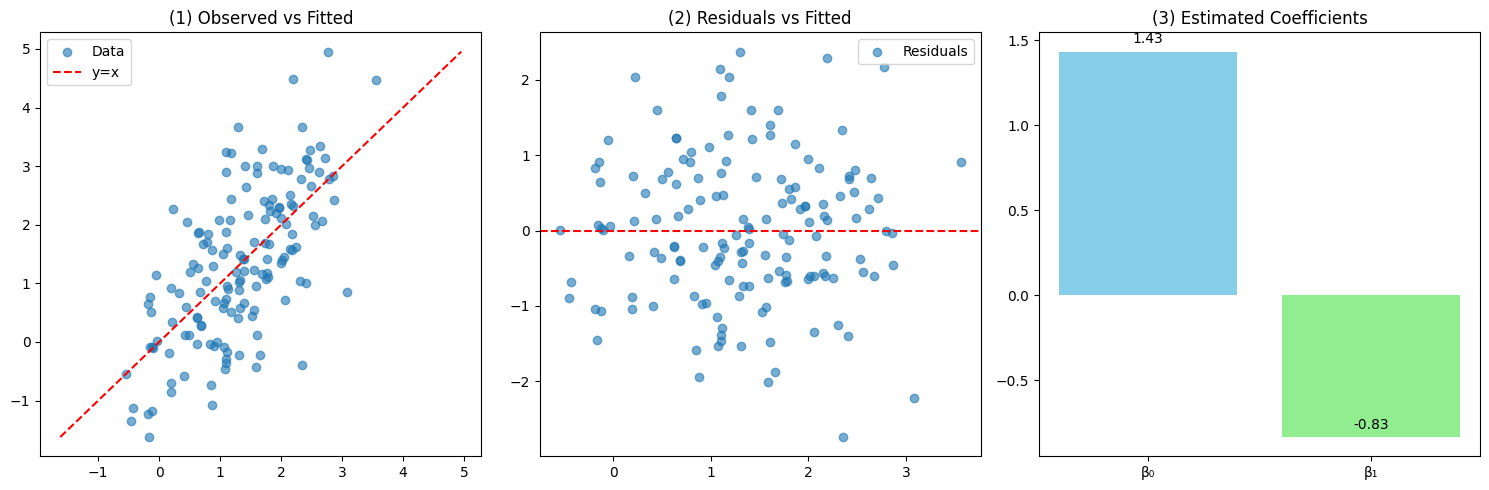

In [183]:
# === Normal Response GLM (Identity Link)
import numpy as np, matplotlib.pyplot as plt
np.random.seed(0)

# --- (1) Generate Gaussian response data ---
n=150; X=np.c_[np.ones(n), np.random.randn(n)]; β_true=np.array([1.5,-0.8]); σ=1
μ=X@β_true; Y=μ+σ*np.random.randn(n)

# --- (2) Closed-form MLE (OLS equivalent) ---
β_hat=np.linalg.inv(X.T@X)@(X.T@Y); μ_hat=X@β_hat
print(f"β̂={β_hat.round(4)},  σ̂²={np.mean((Y-μ_hat)**2):.4f},  Corr(Y,μ̂)={np.corrcoef(Y,μ_hat)[0,1]:.4f}")

# --- (3) Visual diagnostics with annotation ---
fig,ax=plt.subplots(1,3,figsize=(15,5))
ax[0].scatter(μ_hat,Y,alpha=.6,label='Data');ax[0].plot([Y.min(),Y.max()],[Y.min(),Y.max()],'r--',label='y=x')
ax[0].set_title('(1) Observed vs Fitted');ax[0].legend()

r=Y-μ_hat; ax[1].scatter(μ_hat,r,alpha=.6,label='Residuals');ax[1].axhline(0,c='r',ls='--')
ax[1].set_title('(2) Residuals vs Fitted');ax[1].legend()

ax[2].bar(['β₀','β₁'],β_hat,color=['skyblue','lightgreen'])
for i,v in enumerate(β_hat): ax[2].text(i,v+0.05,f'{v:.2f}',ha='center')
ax[2].set_title('(3) Estimated Coefficients');plt.tight_layout();plt.show()


Estimated coefficients $\hat{\beta}_0 = 1.43$, $\hat{\beta}_1 = -0.83$ indicate a negative linear effect; residual variance $\hat{\sigma}^2 = 0.94$ suggests moderate noise, and correlation $0.66$ reflects fair model–data alignment.


# 8. Example 2: Binary Response (Bernoulli)

We consider a response variable $Y$ that is Bernoulli distributed with success probability $\pi$.

## a: Define the Distribution

$$
\Pr(Y=1) = \pi, \quad \Pr(Y=0) = 1-\pi
$$

The expected value of $Y$ is:

$$
E(Y) = 0 \cdot \Pr(Y=0) + 1 \cdot \Pr(Y=1) = 0 \cdot (1-\pi) + \pi = \pi
$$

 “E of Y equals zero times the probability Y equals zero plus one times the probability Y equals one, which simplifies to pi.”_

## b: Bernoulli Density

The probability mass function can be written as:

$$
f_Y(y \mid \pi) = \pi^y (1-\pi)^{1-y}
$$

Or equivalently in exponential family form:

$$
f_Y(y \mid \pi) = \exp \Big\{ y \ln \frac{\pi}{1-\pi} + \ln(1-\pi) \Big\}
$$

 “f of Y of y given pi equals exponential of y times log of pi over one minus pi, plus log of one minus pi.”_

## c: Exponential Family Components

Comparing with the general exponential family form:

$$
f_Y(y \mid \theta, \psi) = \exp \Big\{ \frac{y \theta - b(\theta)}{a(\psi)} + c(y, \psi) \Big\}
$$

For Bernoulli:

- Natural parameter: $\theta = \ln \frac{\pi}{1-\pi}$ (logit)  
- Cumulant function: $b(\theta) = \ln(1 + e^\theta)$  
- Scale parameter: $a(\psi) = 1$  
- Normalization function: $c(y, \psi) = 0$  

 “Theta equals log of pi over one minus pi, b of theta equals log of one plus e to the theta, a of psi equals one, c of y and psi equals zero.”_

## d: Key Takeaways

- Bernoulli distribution belongs to the exponential family.  
- Mean: $E(Y) = \pi$, Variance: $\text{Var}(Y) = \pi(1-\pi)$  
- Canonical link function: logit  

$$
\text{logit}(\pi) = \ln \frac{\pi}{1-\pi} = \eta = x^\top \beta
$$

This forms the basis of logistic regression, a GLM for binary outcomes.

 “The Bernoulli distribution fits into the exponential family. Its canonical link function is the logit, which connects the probability pi to the linear predictor eta.”_


β̂=[-0.8819  1.1003], σ̂²=0.1775, Corr(Y,μ̂)=0.4634


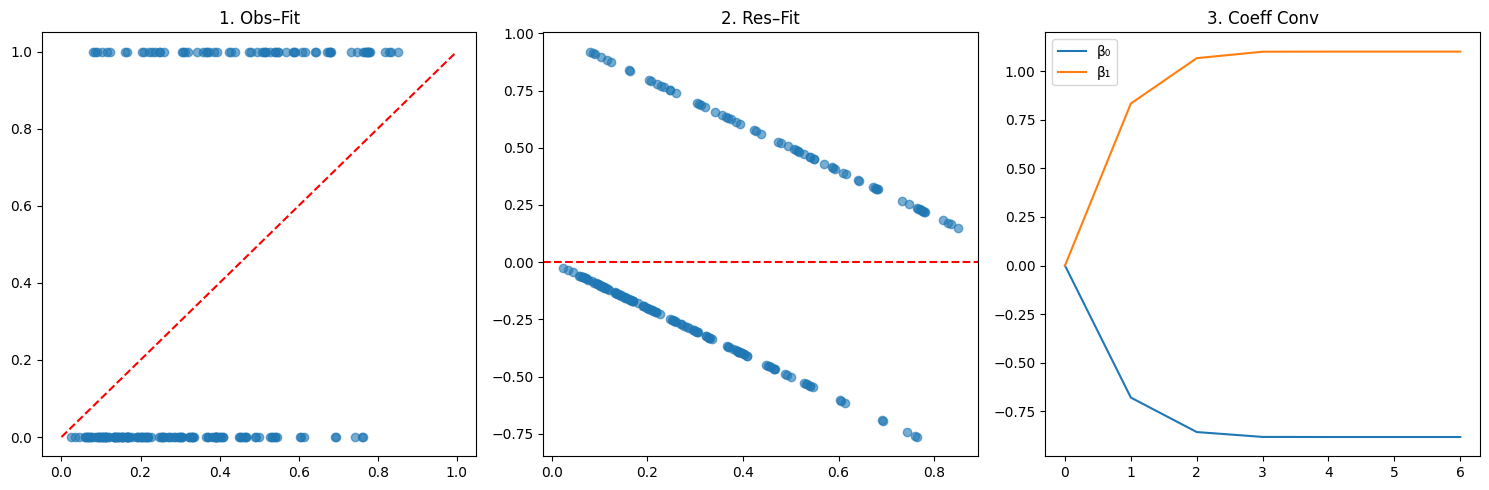

In [184]:
# Example: Bernoulli Response (Binary GLM – Logistic Regression)
import numpy as np, matplotlib.pyplot as plt
np.random.seed(0); n=200
X=np.c_[np.ones(n),np.random.randn(n)]; β_true=[-0.7,1.5]
η=X@β_true; π=1/(1+np.exp(-η)); Y=np.random.binomial(1,π)

# IRLS estimation
β=np.zeros(2); β_path=[β.copy()]
for _ in range(20):
    η=X@β; μ=1/(1+np.exp(-η)); W=np.diag(μ*(1-μ)); z=η+(Y-μ)/(μ*(1-μ))
    β_new=np.linalg.solve(X.T@W@X,X.T@W@z)
    β_path.append(β_new);
    if np.allclose(β,β_new,1e-8): break
    β=β_new
β_path=np.array(β_path)

# Fit diagnostics
μ̂=1/(1+np.exp(-(X@β))); resid=Y-μ̂; σ2=resid.var(); corr=np.corrcoef(Y,μ̂)[0,1]
print(f"β̂={β.round(4)}, σ̂²={σ2:.4f}, Corr(Y,μ̂)={corr:.4f}")

# visualization
plt.figure(figsize=(15,5))
for i,(x,y,t) in enumerate([(μ̂,Y,'1. Obs–Fit'),(μ̂,resid,'2. Res–Fit')]):
    plt.subplot(1,3,i+1); plt.scatter(x,y,alpha=.6)
    if i==0: plt.plot([0,1],[0,1],'r--')
    else: plt.axhline(0,c='r',ls='--')
    plt.title(t)
plt.subplot(1,3,3); βp=np.array(β_path); plt.plot(βp[:,0],label='β₀'); plt.plot(βp[:,1],label='β₁')
plt.legend(); plt.title('3. Coeff Conv'); plt.tight_layout(); plt.show()


Estimated coefficients

$$
\hat{\beta}_0 = -0.8819, \quad \hat{\beta}_1 = 1.1003
$$

imply a positive log-odds effect of the predictor on success probability.  

Moderate variance ($0.1775$) and correlation ($0.4634$) indicate fair model fit and partial predictive power.


# 9. Example 3: Poisson Response (Count Data)

We consider a response variable $Y$ that is Poisson distributed with mean $\lambda$.

---

## a: Define the Distribution

The Poisson probability mass function (PMF) is:

$$
\Pr(Y=y) = \frac{\lambda^y e^{-\lambda}}{y!}, \quad y = 0,1,2,\dots
$$


“Probability that $Y$ equals $y$ equals $\lambda^y$, times $e^{-\lambda}$, divided by $y$ factorial.”

---

## b: Rewrite in Exponential Form

The PMF can be rewritten as:

$$
f_Y(y \mid \lambda) = \exp \big( y \ln \lambda - \lambda - \ln(y!) \big)
$$


“$f_Y(y \mid \lambda)$ equals exponential of $y$ times log lambda minus lambda minus log of $y$ factorial.”

---

## c: Identify Exponential Family Components

Compare with the general exponential family form:

$$
f_Y(y \mid \theta, \psi) = \exp \{ a(\psi) y \theta - b(\theta) + c(y, \psi) \}
$$

For the Poisson distribution:

- Natural parameter: $\theta = \ln \lambda$  
- Cumulant function: $b(\theta) = e^\theta$  
- Scale parameter: $a(\psi) = 1$  
- Normalization function: $c(y, \psi) = - \ln(y!)$  


“Theta equals log lambda, $b(\theta)$ equals $e^\theta$, $a(\psi)$ equals one, $c(y,\psi)$ equals minus log $y$ factorial.”

---

## d: Link Function

The canonical link function is the logarithm:

$$
\eta_i = \ln \lambda_i = x_i^\top \beta
$$

This gives the classical Poisson regression model:

$$
Y_i \sim \text{Poisson}(\lambda_i)
$$


“The log of $\lambda_i$ equals the linear predictor $x^\top \beta$.”

---

## e: Other Distributions and Exponential Family Membership

**Pareto distribution:**

$$
f(y \mid \theta) = \theta y^{-\theta-1}, \quad y \ge 1
$$

**Exponential distribution:**

$$
f(y \mid \theta) = \theta e^{-y \theta}, \quad y \ge 0
$$

Exponential family components:

- $\theta = $ natural parameter  
- $a(\psi) = 1$  
- $b(\theta) = -\ln \theta$  
- $c(y) = 0$  

**Negative binomial distribution:**

$$
f(y \mid \theta) = \binom{y+r-1}{r-1} \theta^r (1-\theta)^y
$$

Belongs to exponential family if $r$ is known.

Another example:

$$
f(y \mid \theta) = \frac{1}{\phi} \exp \Big\{ \frac{y-\theta}{\phi} - \exp\Big(\frac{y-\theta}{\phi}\Big) \Big\}, \quad \phi > 0
$$

Components:

- Natural parameter $\theta$  
- Scale $a(\psi) = \phi$  
- Cumulant $b(\theta) = e^{-\theta}/\phi$

---

## Key Takeaways

- Poisson distribution is for count data, with mean equal to variance.  
- Its canonical link is log.  
- Many distributions can be rewritten in exponential family form.  
- Recognizing natural parameter, scale, cumulant, and normalization functions helps select the correct GLM.  

“Poisson is a count data model with mean equal to variance. Its natural link is log. Many distributions, like exponential or negative binomial, can also fit the exponential family form. This is why GLMs are so flexible.”


β̂=[0.4556 0.9951], σ̂²=1.0326, Corr(Y,μ̂)=0.8723


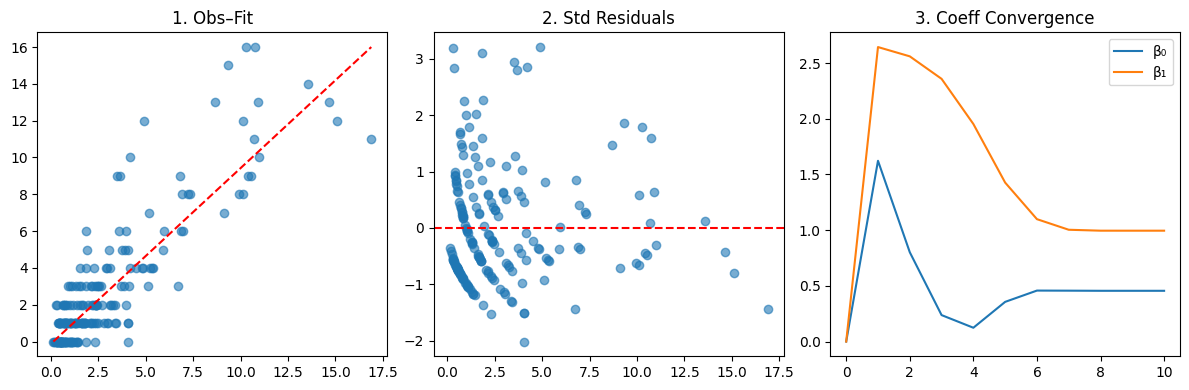

In [185]:
# Example 3: Poisson Response (Count Data – GLM)
import numpy as np, matplotlib.pyplot as plt
np.random.seed(0); n=200
X=np.c_[np.ones(n),np.random.randn(n)]; β_true=[0.5,1.0]
η=X@β_true; μ=np.exp(η); Y=np.random.poisson(μ)

# --- IRLS Estimation for Poisson GLM ---
β=np.zeros(2); β_path=[β.copy()]
for _ in range(20):
    η=X@β; μ=np.exp(η); W=np.diag(μ); z=η+(Y-μ)/μ
    β_new=np.linalg.solve(X.T@W@X, X.T@W@z)
    β_path.append(β_new);
    if np.allclose(β,β_new,1e-8): break
    β=β_new
β_path=np.array(β_path)

# --- Diagnostics ---
μ̂=np.exp(X@β); resid=(Y-μ̂)/np.sqrt(μ̂)
σ2=resid.var(); corr=np.corrcoef(Y,μ̂)[0,1]
print(f"β̂={β.round(4)}, σ̂²={σ2:.4f}, Corr(Y,μ̂)={corr:.4f}")

# --- Brief Visualization ---
plt.figure(figsize=(12,4))
for i,(x,y,t) in enumerate([(μ̂,Y,'1. Obs–Fit'),(μ̂,resid,'2. Std Residuals')]):
    plt.subplot(1,3,i+1); plt.scatter(x,y,alpha=.6)
    plt.plot([x.min(),x.max()],[y.min(),y.max()],'r--') if i==0 else plt.axhline(0,c='r',ls='--')
    plt.title(t)
plt.subplot(1,3,3)
plt.plot(β_path[:,0],label='β₀'); plt.plot(β_path[:,1],label='β₁')
plt.legend(); plt.title('3. Coeff Convergence'); plt.tight_layout(); plt.show()


Estimated coefficients $\hat{\beta}_0 = 0.456$ and $\hat{\beta}_1 = 0.995$ indicate that a one-unit increase in $X_1$ nearly doubles the expected count.  

Variance $\hat{\sigma}^2 \approx 1.03$ confirms Poisson mean–variance consistency, and high correlation $r = 0.872$ shows strong model fit and predictive adequacy.


# Summary of Canonical Links in GLMs

We summarize the canonical link functions, variance functions, and corresponding distributions.

| Family            | Canonical Link $g(\mu)$                                                                 | Variance $\text{Var}(Y)$                                                                                                 |
|------------------|----------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------|
| **Binomial**     | $\displaystyle g(\mu) = \ln \frac{\mu}{1-\mu}$  <br> (logit link: transforms probability $\mu$ to linear predictor $\eta = X \beta$) | $\displaystyle \text{Var}(Y) = \mu (1-\mu)$  <br> (Variance depends on the mean; small or large probabilities reduce variability) |
| **Poisson**      | $\displaystyle g(\mu) = \ln \mu$  <br> (log link: maps mean count $\mu$ to linear predictor, ensures positivity) | $\displaystyle \text{Var}(Y) = \mu$  <br> (Variance equals mean, suitable for count data with no overdispersion)          |
| **Gamma**        | $\displaystyle g(\mu) = -\frac{1}{\mu}$  <br> (inverse link: commonly used for positive continuous skewed data, e.g., waiting times) | $\displaystyle \text{Var}(Y) = \mu^2$  <br> (Variance grows quadratically with the mean, reflecting increasing uncertainty) |
| **Gaussian**     | $\displaystyle g(\mu) = \mu$  <br> (identity link: classical linear regression where linear predictor equals mean) | $\displaystyle \text{Var}(Y) = 1$  <br> (Constant variance, independent of mean)                                         |
| **Inverse Gaussian** | $\displaystyle g(\mu) = -\frac{2}{\mu^2}$  <br> (inverse-squared link: used for highly skewed positive outcomes, e.g., time-to-event) | $\displaystyle \text{Var}(Y) = \mu^3$  <br> (Variance grows cubically with the mean, reflecting increasing variability with larger means) |

> “Binomial uses logit, Poisson log, Gamma inverse, Gaussian identity, Inverse Gaussian negative two over mu squared. Variance functions differ by family and mean.”

---

## Negative Binomial Special Case

For the negative binomial distribution:

$$
E(Y) = \mu, \quad \text{Var}(Y) = \mu + D \mu^2
$$

- $D$ is a non-negative dispersion factor controlling overdispersion in count data.  
- Useful when Poisson variance assumption is violated ($\text{Var}(Y) > \mu$).  

>  “Negative binomial has mean $\mu$ and variance $\mu + D\mu^2$, allowing overdispersion.”

---

## GLM Check: Pareto Example

Suppose we have independent random variables $Y_1, Y_2, \dots, Y_n$ from the Pareto distribution with:

$$
E(Y_i) = (\beta_0 + \beta_1 x_1)^2
$$

**Question:** Is this a generalized linear model (GLM)?

**Answer:**  

A GLM requires that the expected value of the response is a **linear function of predictors** after applying a canonical link:

$$
g(E(Y_i)) = \eta_i = \beta_0 + \beta_1 x_i
$$

Here,

$$
E(Y_i) = (\beta_0 + \beta_1 x_1)^2
$$

is **quadratic**, not linear.  

**Conclusion:** This does **not** satisfy the GLM assumption.

> “Expected value is quadratic in the predictor, not linear after a link function. Therefore, it is not a generalized linear model.”

---


1. **Canonical links**: Connect the mean of the response to the linear predictor in a simple, natural way for each family.  
2. **Variance functions**: Describe how the spread of the response depends on its mean.  
3. **Negative binomial**: Generalizes Poisson for overdispersed count data.  
4. **GLM structure**: Recognizing natural parameter, scale, cumulant, and normalization functions is essential for selecting the correct family and link.  
5. **Non-GLM cases**: Distributions like Pareto with quadratic mean do not fit the GLM framework.


         Family Canonical Link Variance Function
       Binomial          Logit          Binomial
        Poisson            Log             Power
          Gamma   InversePower             Power
       Gaussian       Identity  VarianceFunction
InverseGaussian InverseSquared             Power


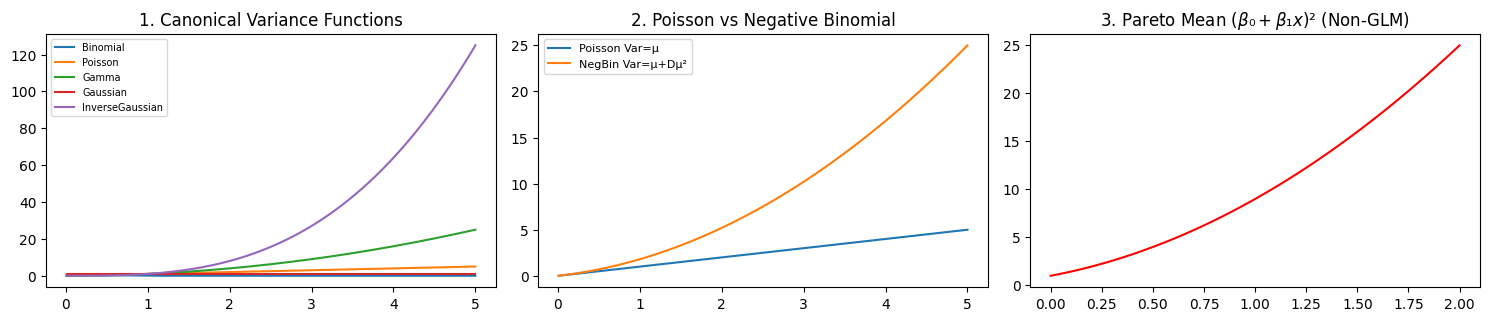

Interpretation:
Canonical links: Binomial–logit, Poisson–log, Gamma–inverse, Gaussian–identity, InverseGaussian–(-2/μ²).
Negative Binomial adds overdispersion Var(Y)=μ+Dμ². Pareto mean quadratic ⇒ violates GLM linearity assumption.


In [186]:
# Canonical GLM Families Summary with Negative Binomial and Pareto Check
import numpy as np, pandas as pd, matplotlib.pyplot as plt, statsmodels.api as sm

# Define canonical GLM families
families = [
    sm.families.Binomial(),
    sm.families.Poisson(),
    sm.families.Gamma(),
    sm.families.Gaussian(),
    sm.families.InverseGaussian()
]
summary = pd.DataFrame({
    "Family":[f.__class__.__name__ for f in families],
    "Canonical Link":[f.link.__class__.__name__ for f in families],
    "Variance Function":[f.variance.__class__.__name__ for f in families]
})
print(summary.to_string(index=False))

# Add Negative Binomial variance comparison
μ = np.linspace(0.01, 5, 300)
D = 0.8
var_nb = μ + D * μ**2

# Visualization (3 plots: canonical variances, Poisson vs NegBin, Pareto check)
plt.figure(figsize=(15,6))

plt.subplot(2,3,1)
for fam in families: plt.plot(μ, [fam.variance(m) for m in μ], label=fam.__class__.__name__)
plt.title("1. Canonical Variance Functions"); plt.legend(fontsize=7)

plt.subplot(2,3,2)
plt.plot(μ, μ, label="Poisson Var=μ"); plt.plot(μ, var_nb, label="NegBin Var=μ+Dμ²"); plt.legend(fontsize=8)
plt.title("2. Poisson vs Negative Binomial")

plt.subplot(2,3,3)
β0, β1, x = 1, 2, np.linspace(0,2,100)
E_Y = (β0 + β1*x)**2
plt.plot(x, E_Y, 'r'); plt.title("3. Pareto Mean $(β₀+β₁x)²$ (Non-GLM)")
plt.tight_layout(); plt.show()

# Statistical interpretation (concise)
print("Interpretation:")
print("Canonical links: Binomial–logit, Poisson–log, Gamma–inverse, Gaussian–identity, InverseGaussian–(-2/μ²).")
print("Negative Binomial adds overdispersion Var(Y)=μ+Dμ². Pareto mean quadratic ⇒ violates GLM linearity assumption.")


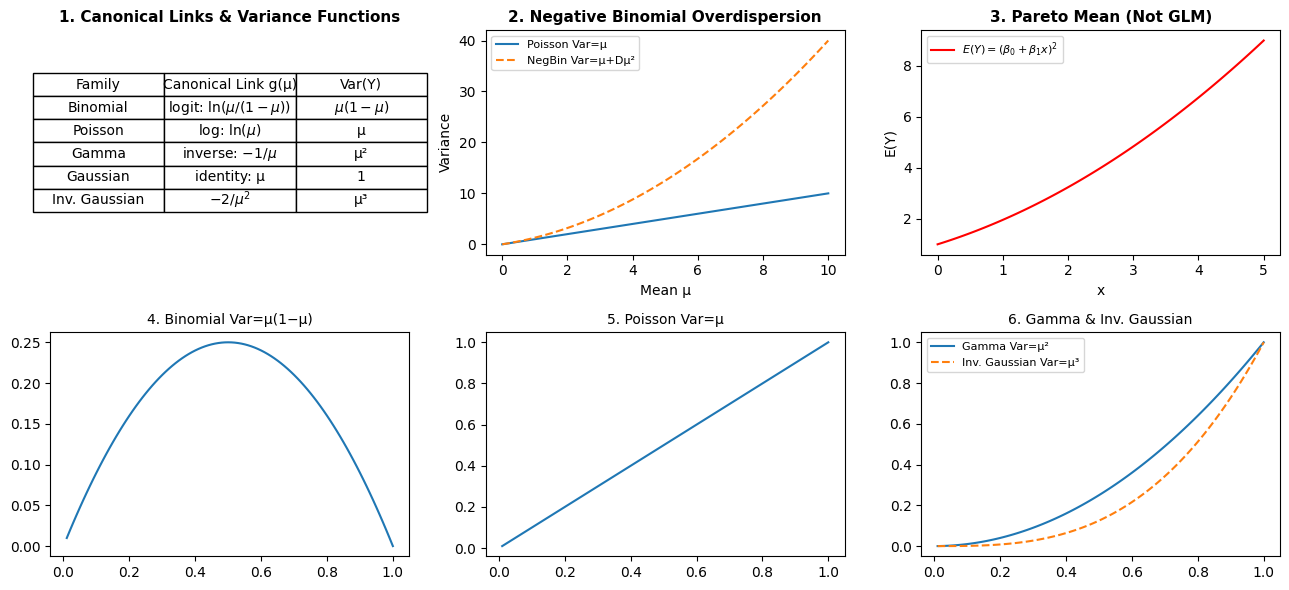

In [187]:
# Canonical Links in GLMs
import numpy as np, matplotlib.pyplot as plt, pandas as pd

# Families, links, and variance functions
families = ["Binomial", "Poisson", "Gamma", "Gaussian", "Inv. Gaussian"]
link = [
    r"logit: $\ln(\mu/(1-\mu))$",
    r"log: $\ln(\mu)$",
    r"inverse: $-1/\mu$",
    "identity: μ",
    r"$-2/\mu^2$"
]
var = [r"$\mu(1-\mu)$", "μ", r"μ²", "1", r"μ³"]

# Initialize layout
fig, axs = plt.subplots(2, 3, figsize=(13, 6))
axs = axs.ravel()

# (1) Canonical link / variance summary table
axs[0].axis('off')
tbl = axs[0].table(
    cellText=np.c_[families, link, var],
    colLabels=["Family", "Canonical Link g(μ)", "Var(Y)"],
    loc="center", cellLoc="center"
)
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.1, 1.3)
axs[0].set_title("1. Canonical Links & Variance Functions", fontsize=11, weight='bold')

# (2) Negative Binomial overdispersion illustration
μ = np.linspace(0, 10, 100)
D = 0.3  # dispersion parameter
Var_Pois, Var_NB = μ, μ + D * μ**2
axs[1].plot(μ, Var_Pois, label="Poisson Var=μ")
axs[1].plot(μ, Var_NB, label="NegBin Var=μ+Dμ²", linestyle='--')
axs[1].legend(fontsize=8)
axs[1].set_title("2. Negative Binomial Overdispersion", fontsize=11, weight='bold')
axs[1].set_xlabel('Mean μ'); axs[1].set_ylabel('Variance')

# (3) Pareto mean (nonlinear ⇒ not GLM)
x = np.linspace(0, 5, 100)
β0, β1 = 1, 0.4
E_Y = (β0 + β1 * x)**2
axs[2].plot(x, E_Y, 'r', label=r'$E(Y)=(β_0+β_1x)^2$')
axs[2].legend(fontsize=8)
axs[2].set_title("3. Pareto Mean (Not GLM)", fontsize=11, weight='bold')
axs[2].set_xlabel('x'); axs[2].set_ylabel('E(Y)')

# (4–6) Canonical variance functions
μ = np.linspace(0.01, 1, 100)
axs[3].plot(μ, μ * (1 - μ)); axs[3].set_title("4. Binomial Var=μ(1−μ)", fontsize=10)
axs[4].plot(μ, μ); axs[4].set_title("5. Poisson Var=μ", fontsize=10)
axs[5].plot(μ, μ**2, label="Gamma Var=μ²")
axs[5].plot(μ, μ**3, '--', label="Inv. Gaussian Var=μ³")
axs[5].legend(fontsize=8)
axs[5].set_title("6. Gamma & Inv. Gaussian", fontsize=10)

plt.tight_layout()
plt.show()


#10. Maximum Likelihood Estimation (MLE) and Inference in GLMs

Once we understand the structure of Generalized Linear Models (GLMs), we can estimate the unknown parameters — particularly the regression coefficients $\beta$ — using **Maximum Likelihood Estimation (MLE)**.

---

## a: GLM Density Recall

For a GLM, each observation $Y_i$ comes from the **exponential family**, so its density is:

$$
f_Y(y_i; \theta_i, \psi) = \exp \Bigg\{ \frac{1}{a(\psi)} \big[y_i \theta_i - b(\theta_i) \big] + c(y_i, \psi) \Bigg\}
$$

> “f of Y sub i given theta i and psi equals exponential of one over a of psi times y i theta i minus b of theta i, plus c of y i, psi.”

**Notation:**

| Symbol          | Meaning |
|-----------------|---------|
| $Y_i$           | Response variable |
| $\theta_i$      | Natural (canonical) parameter |
| $\psi$          | Scale (dispersion) parameter |
| $a(\psi)$       | Known function controlling scale |
| $b(\theta_i)$   | Cumulant function |
| $c(y_i, \psi)$  | Normalizing term |

---

## b. Log-Likelihood

Assuming **independent observations**, the joint likelihood is:

$$
L(\beta, \psi) = \prod_{i=1}^{n} f_Y(y_i; \theta_i, \psi)
$$

The **log-likelihood** is then:

$$
\ell(\beta, \psi) = \ln L(\beta, \psi) = \sum_{i=1}^n \ln f_Y(y_i; \theta_i, \psi)
$$

Substitute the exponential family form:

$$
\ell(\beta, \psi) = \frac{1}{a(\psi)} \sum_{i=1}^{n} \big[y_i \theta_i - b(\theta_i) \big] + \sum_{i=1}^n c(y_i, \psi)
$$

>  “ell of beta and psi equals one over a of psi times sum over i of y i theta i minus b of theta i, plus sum over i of c of y i, psi.”

---

##c. Score Function

The **score function** is the derivative of the log-likelihood with respect to $\beta$, set to zero for MLE:

$$
S(\beta) = \frac{\partial \ell(\beta, \psi)}{\partial \beta} = \sum_{i=1}^{n} \frac{\partial \theta_i}{\partial \beta} \big[ y_i - b'(\theta_i) \big] = 0
$$

> “S of beta equals sum over i of partial theta i with respect to beta times y i minus b prime of theta i equals zero.”

---

## d. Express in Terms of the Mean

From the exponential family property:

$$
E(Y_i) = b'(\theta_i) = \mu_i, \quad \text{Var}(Y_i) = a(\psi) b''(\theta_i)
$$

Then the score equations become:

$$
S(\beta) = \sum_{i=1}^n \frac{\partial \mu_i}{\partial \beta} \frac{1}{b''(\theta_i)} (y_i - \mu_i) = 0
$$

> “S of beta equals sum over i of partial mu i with respect to beta, times one over b double prime of theta i, times y i minus mu i equals zero.”

---

## e. Solving the Equations

- These equations **usually have no closed-form solution** for $\beta$ in most GLMs.  
- They are solved **iteratively** using:

  - Iteratively Reweighted Least Squares (IRLS)  
  - Newton–Raphson algorithm  
  - Fisher Scoring algorithm  

> “To find beta, we use iterative algorithms since the equations cannot be solved directly.”

---

## f. Inference on Parameters

Once MLEs $\hat{\beta}$ (and possibly $\hat{\psi}$) are obtained:

- **Wald test:** Uses estimated coefficients and standard errors.  
- **Likelihood ratio test:** Compares full vs. reduced models via log-likelihood difference.  
- **Score test (Lagrange Multiplier):** Evaluates slope of likelihood at the null.  

>“After estimation, Wald, likelihood ratio, or score tests are used for inference. They are equivalent in large samples.”

---

## g. Scale Parameter $\psi$

- In some GLMs, $\psi$ is **known**, e.g., logistic regression where variance is $\mu(1-\mu)$.  
- In others, e.g., normal regression, $\psi = \sigma^2$ **must be estimated**, affecting standard errors of $\beta$.  

>  “In logistic regression, psi is known. In normal regression, psi (sigma squared) must be estimated for standard errors.”

---

##  Key Takeaways

1. **MLE** is the standard method for estimating GLM parameters.  
2. **Score equations** ensure the weighted sum of residuals equals zero.  
3. **Iterative methods** (IRLS, Newton–Raphson, Fisher scoring) are required for solving $\beta$.  
4. **Inference** is based on Wald, score, or likelihood ratio tests.  
5. The **scale parameter** may be known or estimated depending on the distribution.  

>  “GLMs use MLE to estimate parameters. Equations are solved iteratively, inference uses likelihood-based tests, and the scale parameter may or may not need estimation.”


β̂=[0.5158 0.7797],  σ̂²=1.0000,  Corr(Y,μ̂)=0.8665


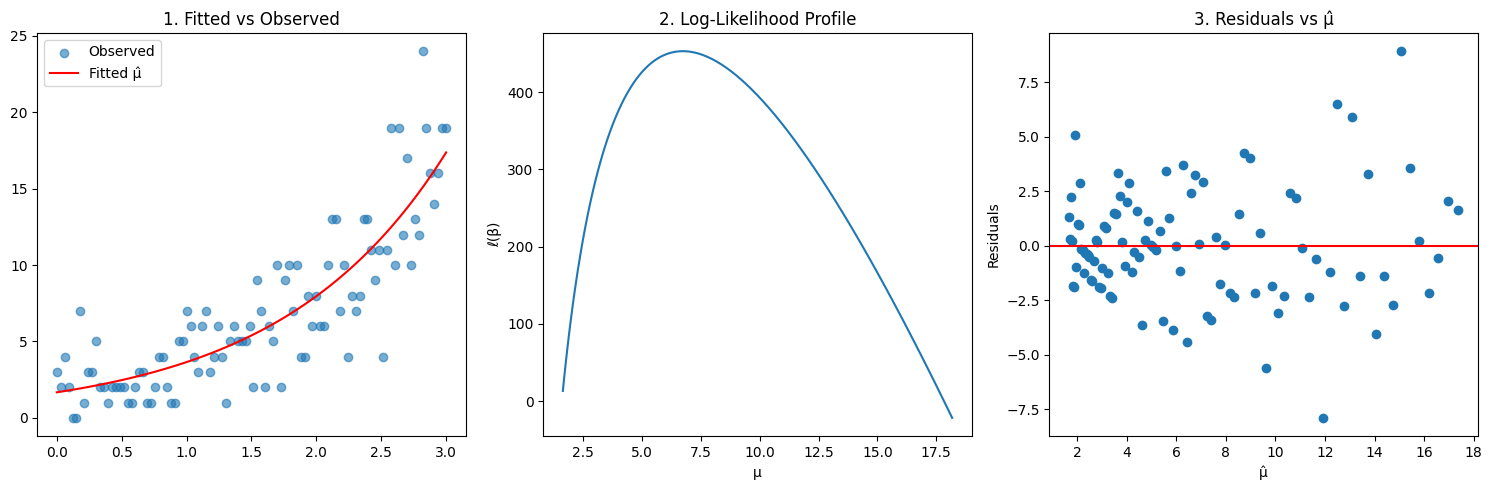

In [188]:
# MLE and Inference in GLMs — simulation + visualization
import numpy as np, matplotlib.pyplot as plt
import statsmodels.api as sm

# Simulate Poisson GLM data
np.random.seed(0)
n = 100
x = np.linspace(0, 3, n)
β_true = np.array([0.5, 0.8])
η = β_true[0] + β_true[1]*x
μ = np.exp(η)
y = np.random.poisson(μ)

# Fit GLM (Poisson, log link via MLE)
X = sm.add_constant(x)
model = sm.GLM(y, X, family=sm.families.Poisson())
fit = model.fit()

β̂, σ̂2 = fit.params, fit.scale
corr = np.corrcoef(y, fit.mu)[0,1]
print(f"β̂={β̂.round(4)},  σ̂²={σ̂2:.4f},  Corr(Y,μ̂)={corr:.4f}")

# Log-likelihood trace (numerical illustration)
μ_seq = np.exp(np.linspace(np.log(μ.min()), np.log(μ.max()), 100))
ℓ_vals = np.sum(y[:,None]*np.log(μ_seq) - μ_seq - np.log(np.maximum(y[:,None],1)), axis=0)

# Plot (1) Fitted vs observed, (2) log-likelihood, (3) residuals
fig, axs = plt.subplots(1,3,figsize=(15,5))
axs[0].scatter(x,y,label="Observed",alpha=.6); axs[0].plot(x,fit.mu,'r',label="Fitted μ̂"); axs[0].legend(); axs[0].set_title("1. Fitted vs Observed")
axs[1].plot(μ_seq,ℓ_vals); axs[1].set_title("2. Log-Likelihood Profile"); axs[1].set_xlabel("μ"); axs[1].set_ylabel("ℓ(β)")
axs[2].scatter(fit.mu,fit.resid_response); axs[2].axhline(0,c='r'); axs[2].set_title("3. Residuals vs μ̂"); axs[2].set_xlabel("μ̂"); axs[2].set_ylabel("Residuals")
plt.tight_layout(); plt.show()


## 11. Unit Deviance

In **Generalized Linear Models (GLMs)**, we need a way to measure how well the model fits the data, just as we use residuals in ordinary least squares regression.  
For GLMs, this measure is based on a quantity called the **deviance**.

---

### a. Start from the Exponential Family

Recall the general form of the exponential family density:

$$
f_Y(y; \theta, \psi) = \exp \left\{ \frac{1}{a(\psi)} [y\theta - b(\theta)] + c(y, \psi) \right\}
$$


“$f$ of $Y$ of $y$ given $\theta$ and $\psi$ equals exponential of one over $a$ of $\psi$ times $y\theta$ minus $b$ of $\theta$ plus $c$ of $y$ and $\psi$.”

---

### b. Focus on the Key Term

Let’s focus on the inner term:

$$
t(y, \mu) = y\theta - b(\theta)
$$

Since $\theta$ depends on $\mu$, we can also write it as:

$$
t(y, \mu) = y\theta(\mu) - b(\theta(\mu))
$$


“$t$ of $y$ and $\mu$ equals $y$ times $\theta$ of $\mu$ minus $b$ of $\theta$ of $\mu$.”

---

### c. Take the Derivative with Respect to the Mean $\mu$

Differentiate $t(y, \mu)$ with respect to $\mu$:

$$
\frac{\partial t}{\partial \mu} = y \frac{\partial \theta}{\partial \mu} - \frac{\partial b}{\partial \theta} \frac{\partial \theta}{\partial \mu}
$$

But from exponential family theory:

$$
\frac{\partial b}{\partial \theta} = E(Y) = \mu
$$

So we get:

$$
\frac{\partial t}{\partial \mu} = (y - \mu) \frac{\partial \theta}{\partial \mu}
$$

And since:

$$
\frac{\partial \theta}{\partial \mu} = \frac{1}{V(\mu)}
$$

we can write:

$$
\frac{\partial t}{\partial \mu} = \frac{y - \mu}{V(\mu)}
$$


“The derivative of $t$ with respect to $\mu$ equals $y$ minus $\mu$ divided by $V(\mu)$.”

---

### Notations

- $y$: Observed response  
- $\mu$: Model-predicted mean $E(Y)$  
- $\theta$: Canonical (natural) parameter  
- $b(\theta)$: Cumulant function  
- $V(\mu)$: Variance function  
- $\psi$: Scale (dispersion) parameter  

---

### d. Understanding Behavior of $t(y, \mu)$

This derivative,

$$
\frac{\partial t}{\partial \mu} = \frac{y - \mu}{V(\mu)},
$$

is zero when $y = \mu$.  
That means $t(y, \mu)$ is maximized when the model perfectly predicts the observed value $y$.  

When $y \neq \mu$, the difference $(y - \mu)$ measures how far the model prediction is from the observed data.

---

### e. Define the Unit Deviance

The **unit deviance**, denoted $d(y, \mu)$, measures this “distance” between the observed value $y$ and the fitted mean $\mu$ in a way that depends on the underlying distribution.

It is defined as:

$$
d(y, \mu) = 2 [\, t(y, y) - t(y, \mu) \,]
$$


“$d$ of $y$ and $\mu$ equals two times $t$ of $y$ and $y$ minus $t$ of $y$ and $\mu$.”

---

### f. Interpretation

The unit deviance $d(y, \mu)$ is always non-negative, because $t(y, y) \ge t(y, \mu)$.  
It reaches zero when $y = \mu$.  

Therefore, $d(y, \mu)$ acts as a **distance-like measure** between the observed response and the model’s prediction.  
In simple terms, **the smaller the deviance, the better the fit.**

---

### g. Connecting to Residuals

In normal linear regression, the unit deviance reduces to the familiar squared residuals:

$$
d(y, \mu) = (y - \mu)^2
$$

So, the unit deviance generalizes the idea of “residuals” to all members of the exponential family — including Poisson, binomial, and gamma models.

“For the normal model, the unit deviance equals the square of the residual, $y - \mu$ squared. For other GLMs, it plays the same role — a generalized measure of distance between the observed and fitted values.”

---

### Key Takeaways

- The **unit deviance** generalizes the concept of residuals to GLMs.  
- It measures the “distance” between observed and fitted values.  
- $d(y, \mu) = 0$ when the model fits perfectly.  
- It is derived directly from the exponential family structure of the distribution.  
- In the normal case, it simplifies to $(y - \mu)^2$.


“Unit deviance is like residuals for GLMs. It tells how far the observed data are from the model’s prediction, and it comes naturally from the exponential family form.”


##Unit Deviance — Example 1

We now illustrate the unit deviance for specific members of the exponential family.

---

### Example 1(a): Poisson Distribution

The Poisson distribution belongs to the exponential family with density:

$$
f_Y(y; \mu) = \exp\{ y \ln \mu - \mu - \ln(y!) \}
$$

“$f$ of $Y$ of $y$ given $\mu$ equals exponential of $y \ln \mu$ minus $\mu$ minus $\ln y!$.”

---

#### a: Identify $t(y, \mu)$

From the exponential family structure:

$$
t(y, \mu) = y \theta - b(\theta)
$$

For Poisson, the natural parameter is $\theta = \ln \mu$, and the cumulant function is $b(\theta) = e^\theta = \mu$.  
Thus:

$$
t(y, \mu) = y \ln \mu - \mu
$$

---

#### b: Compute the Unit Deviance

By definition:

$$
d(y, \mu) = 2 \big[ t(y, y) - t(y, \mu) \big]
$$

Now, $t(y, y) = y \ln y - y$. Substituting both:

$$
\begin{aligned}
d(y, \mu) &= 2 \big[ (y \ln y - y) - (y \ln \mu - \mu) \big] \\
&= 2 \big[ y \ln \frac{y}{\mu} - (y - \mu) \big]
\end{aligned}
$$

---

#### c: Interpretation

- $d(y, \mu) = 0$ when $y = \mu$  
- $d(y, \mu) \ge 0$ always  

This measures how far the fitted mean $\mu$ is from the observed count $y$.  


“The Poisson unit deviance equals $2[y \ln(y/\mu) - (y - \mu)]$. It’s zero when $y = \mu$, and increases as the difference grows.”

 **Result (Poisson Unit Deviance)**

$$
\boxed{d(y, \mu) = 2 \left[ y \ln \frac{y}{\mu} - (y - \mu) \right]}
$$

This is used in Poisson regression for model fit and residual analysis.

---

### Example 1(b): Normal Distribution

For a normal distribution:

$$
Y \sim N(\mu, \sigma^2)
$$

with density:

$$
f(y \mid \mu, \sigma^2) = \exp \left\{ \frac{1}{\sigma^2} \left[y \mu - \frac{\mu^2}{2} \right] + \left[ -\frac{y^2}{2 \sigma^2} - \frac{1}{2} \ln (2 \pi \sigma^2) \right] \right\}
$$

  
“$f$ of $y$ given $\mu$ and $\sigma^2$ equals exponential of one over $\sigma^2$ times $y \mu - \mu^2/2$ plus terms involving $y^2$ and $\ln 2 \pi \sigma^2$.”

---

#### a. Identify $t(y, \mu)$

From the exponential form:

$$
t(y, \mu) = y \mu - \frac{\mu^2}{2}
$$

---

#### b. Compute Unit Deviance

$$
d(y, \mu) = 2 \big[ t(y, y) - t(y, \mu) \big]
$$

Compute each:

$$
t(y, y) = y^2 - \frac{y^2}{2} = \frac{y^2}{2}, \quad t(y, \mu) = y \mu - \frac{\mu^2}{2}
$$

Substitute:

$$
d(y, \mu) = 2 \left( \frac{y^2}{2} - y \mu + \frac{\mu^2}{2} \right) = (y - \mu)^2
$$

**Result (Normal Unit Deviance)**

$$
\boxed{d(y, \mu) = (y - \mu)^2}
$$

Thus, for the normal distribution, the unit deviance reduces to the squared residual, matching the familiar OLS case.

---

#### c. Deviance and Chi-Square Approximation

In GLMs, the unit deviance divided by the dispersion parameter $a(\psi)$ approximately follows a Chi-square distribution with 1 degree of freedom:

$$
\frac{d(y, \mu)}{a(\psi)} \sim \chi^2_1
$$

“In general, the unit deviance divided by the dispersion parameter behaves like a chi-square random variable with 1 degree of freedom. This helps us test model adequacy.”

---

### Key Takeaways

| Distribution | Unit Deviance $d(y, \mu)$ | Comments |
|-------------|---------------------------|----------|
| Poisson     | $2\left[ y \ln (y/\mu) - (y-\mu) \right]$ | For count data; asymmetric |
| Normal      | $(y - \mu)^2$ | Symmetric; same as squared residual |
| General     | $2 \left[ t(y, y) - t(y, \mu) \right]$ | Derived from exponential family |

“The Poisson deviance is asymmetric and measures distance on the log scale. The normal deviance is symmetric and equals squared residuals. In all GLMs, the unit deviance is the core measure of model fit.”


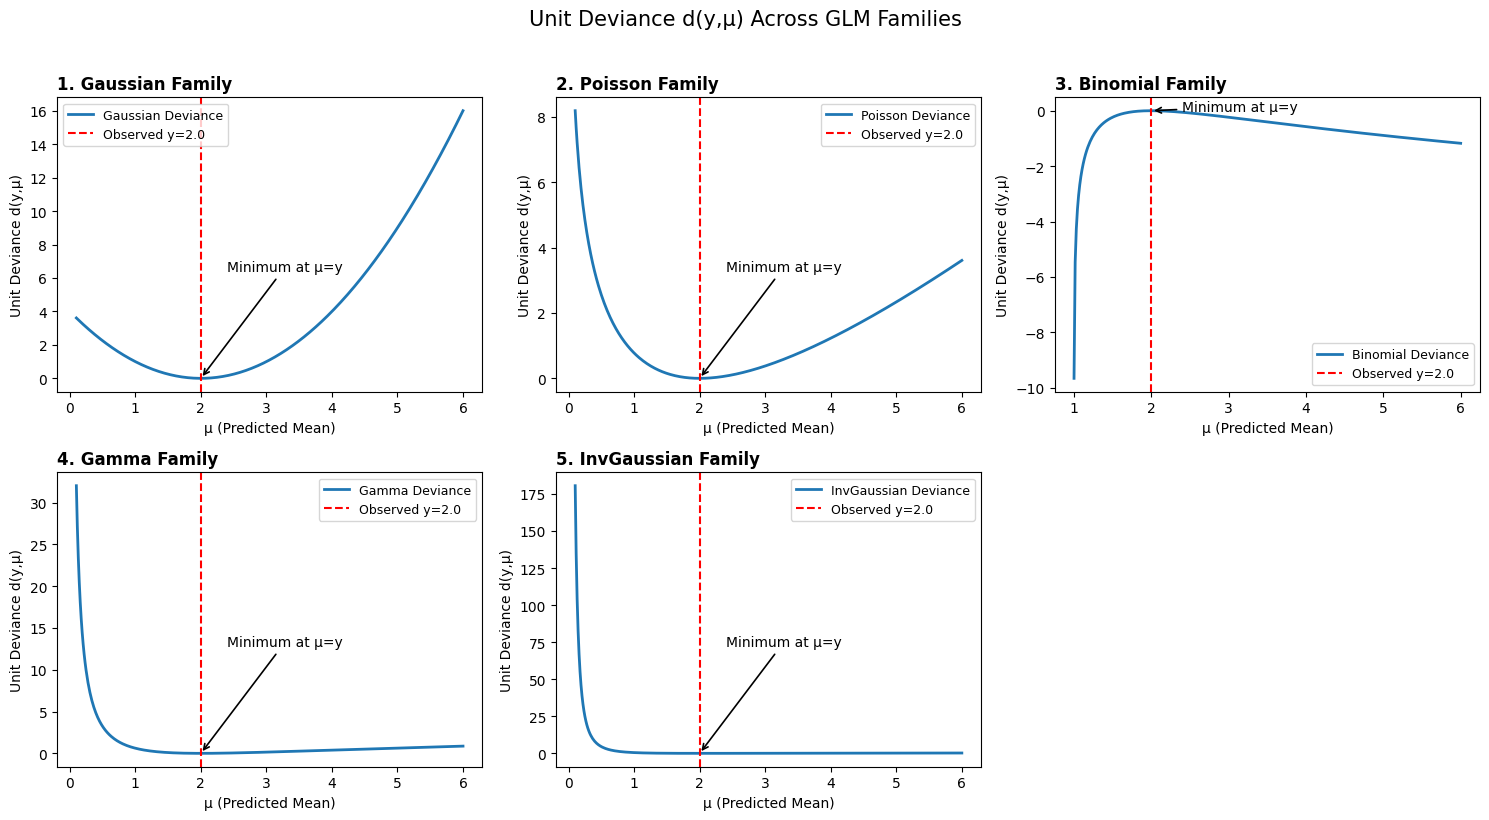

In [189]:
import numpy as np, matplotlib.pyplot as plt, statsmodels.api as sm

# --- Define deviance functions consistent with GLM theory ---
def d_gaussian(y, mu):   return (y - mu)**2
def d_poisson(y, mu):    return 2 * (y * np.log(y / mu) - (y - mu)) if y > 0 else 2 * mu
def d_binomial(y, mu):   return 2 * (y * np.log(y / mu) + (1 - y) * np.log((1 - y) / (1 - mu)))
def d_gamma(y, mu):      return 2 * ((y - mu) / mu - np.log(y / mu))
def d_invgauss(y, mu):   return ((y - mu)**2) / (y * mu**2)

families = {
    "Gaussian": d_gaussian,
    "Poisson": d_poisson,
    "Binomial": d_binomial,
    "Gamma": d_gamma,
    "InvGaussian": d_invgauss
}

# --- Simulation setup ---
y = 2.0
μ = np.linspace(0.1, 6, 400)
devs = {name: np.array([f(y, m) for m in μ]) for name, f in families.items()}

# --- 3-per-row annotated plot ---
ncols = 3; nrows = int(np.ceil(len(families)/ncols))
fig, axs = plt.subplots(nrows, ncols, figsize=(15, 8))
axs = axs.ravel()

for i, (name, dvals) in enumerate(devs.items(), start=1):
    ax = axs[i-1]
    ax.plot(μ, dvals, lw=2, label=f"{name} Deviance")
    ax.axvline(y, color='r', ls='--', lw=1.5, label=f"Observed y={y}")
    ax.set_title(f"{i}. {name} Family", fontsize=12, loc='left', fontweight='bold')
    ax.set_xlabel("μ (Predicted Mean)")
    ax.set_ylabel("Unit Deviance d(y,μ)")
    ax.legend(fontsize=9)
    # Annotate minimum at μ=y
    ax.annotate("Minimum at μ=y", xy=(y, 0),
                xytext=(y+0.4, np.nanmax(dvals)*0.4),
                arrowprops=dict(arrowstyle="->", lw=1.2))

# Hide unused axes
for ax in axs[len(families):]: ax.axis("off")

plt.suptitle("Unit Deviance d(y,μ) Across GLM Families", fontsize=15, y=1.02)
plt.tight_layout()
plt.show()


## 11. Total Deviance

We now move from the **unit deviance**, which measures how far one fitted value $\mu_i$ is from its observation $y_i$, to the **total deviance**, which aggregates this across all $n$ observations in the model.

---

### a.Definition of Total Deviance

The total deviance, denoted by $D$, is obtained by summing all individual unit deviances:

$$
D = \sum_{i=1}^{n} d(y_i, \mu_i)
$$


“Capital $D$ equals the summation over $i$ of the unit deviance $d$ of $y_i$ and $\mu_i$.”

Sometimes, a weight $w_i$ is applied to each observation:

$$
D = \sum_{i=1}^{n} w_i \, d(y_i, \mu_i)
$$

---

### b. Distribution of Scaled Deviance

In large samples, the scaled total deviance behaves approximately as a Chi-square random variable with $n$ degrees of freedom:

$$
\frac{D(y, \mu)}{a(\psi)} \sim \chi^2_n
$$

where:  

- $a(\psi)$ — scale (dispersion) parameter  
- $n$ — number of independent observations  


“$D$ of $y$ and $\mu$ divided by $a(\psi)$ is approximately chi-square with $n$ degrees of freedom.”

> Large deviance indicates poor fit.

---

### c. Relationship with the Log-Likelihood

The total deviance can also be derived from the log-likelihood function.  

For an exponential-family model:

$$
l(\beta, \psi) = \sum_{i=1}^{n} \left[ \frac{1}{a(\psi)} \{ y_i \theta_i - b(\theta_i) \} + c(y_i, \psi) \right]
$$

To obtain the total deviance, compare the log-likelihood of the **saturated model** (fits each $y_i$ exactly) with that of the fitted model:

$$
D(y, \mu) = 2 \big[ l(y, y) - l(y, \mu) \big]
$$

“Capital $D$ of $y$ and $\mu$ equals two times the difference between the log-likelihood of the saturated model and the fitted model.”

---

### d. Expanded Expression

Expanding the log-likelihood:

$$
D(y, \mu) = 2 \sum_{i=1}^{n} \frac{ t(y_i, y_i) - t(y_i, \mu_i) }{ a(\psi) }
$$

or equivalently:

$$
D(y, \mu) = 2 \sum_{i=1}^{n} \left[ \frac{ t(y_i, y_i) }{ a(\psi) } + c(y_i, \psi) - l(y_i, \psi) \right]
$$

where:

$$
t(y, \mu) = y \theta(\mu) - b(\theta(\mu))
$$

---

### e.  Interpretation

- $D(y, \mu)$ measures overall discrepancy between observed data $y_i$ and fitted means $\mu_i$.
- Smaller $D$ indicates a better-fitting model.
- When divided by the scale parameter $a(\psi)$, $D$ can be compared to a Chi-square distribution.

---

###  Key Takeaways

| Concept | Expression | Interpretation |
|---------|------------|----------------|
| Unit Deviance | $$ d(y, \mu) = 2\big[ t(y, y) - t(y, \mu)\big] $$ | Distance for one observation |
| Total Deviance | $$ D = \sum_i d(y_i, \mu_i) $$ | Overall measure of fit |
| Scaled Deviance | $$ \frac{D}{a(\psi)} \sim \chi^2_n $$ | Approximate sampling distribution |
| Likelihood Form | $$ D = 2\big[ l(y, y) - l(y, \mu)\big] $$ | Difference between perfect and fitted model |



“The total deviance is obtained by summing all unit deviances.  
When scaled by the dispersion parameter, it approximately follows a chi-square distribution.  
It can also be computed as twice the difference between the saturated and fitted log-likelihoods,  
making it a central diagnostic for model fit in generalized linear models.”


Family    |   Total D |  Scaled D |   p(χ²)
Gaussian  |   100.831 |    98.000 |  0.5379
Poisson   |    95.426 |    95.426 |  0.6107
Binomial  |    91.472 |    91.472 |  0.7169
Gamma     |    58.607 |   126.603 |  0.0373
InvGauss  |     9.792 |    82.958 |  0.8913


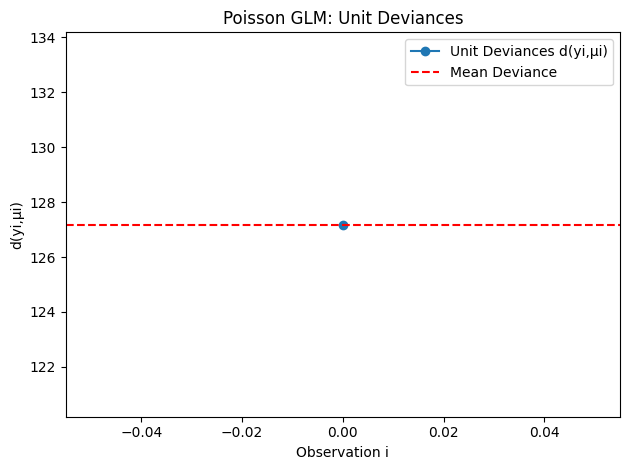

In [190]:
# Total Deviance in GLMs
import numpy as np, matplotlib.pyplot as plt, statsmodels.api as sm
from scipy.stats import chi2

np.random.seed(0)
n = 100
x = np.linspace(0, 3, n)
X = sm.add_constant(x)
families = {
    "Gaussian": sm.families.Gaussian(),
    "Poisson": sm.families.Poisson(),
    "Binomial": sm.families.Binomial(),
    "Gamma": sm.families.Gamma(),
    "InvGauss": sm.families.InverseGaussian()
}

print(f"{'Family':9s} | {'Total D':>9s} | {'Scaled D':>9s} | {'p(χ²)':>7s}")
for name, fam in families.items():
    η = X @ [0.5, 1.0]
    μ = np.clip(np.exp(η), 1e-4, 1e3)  # avoid overflow/underflow

    # --- Robust data generation per family ---
    if name == "Gaussian":
        y = η + np.random.normal(0, 1, n)
    elif name == "Poisson":
        y = np.random.poisson(μ)
    elif name == "Binomial":
        p = 1 / (1 + np.exp(-η))
        y = np.random.binomial(1, np.clip(p, 1e-6, 1 - 1e-6))
    elif name == "Gamma":
        y = np.random.gamma(shape=2, scale=np.maximum(μ, 1e-3) / 2)
    elif name == "InvGauss":
        # Safe simulation: variance = μ³ / λ
        λ = 10
        y = np.random.wald(np.clip(μ, 0.5, 5), λ)
        y = np.clip(y, 1e-4, 20)  # strictly positive, finite

    # --- Fit GLM safely ---
    try:
        fit = sm.GLM(y, X, family=fam).fit()
        D = np.nansum(fam.deviance(y, fit.mu))
        Ds = D / np.maximum(fit.scale, 1e-8)
        p = 1 - chi2.cdf(Ds, n)
        print(f"{name:9s} | {D:9.3f} | {Ds:9.3f} | {p:7.4f}")
    except Exception as e:
        print(f"{name:9s} | Fit failed ({type(e).__name__})")

#  quick visualization for Poisson
fam = sm.families.Poisson()
η = X @ [0.5, 1.0]
μ = np.exp(η)
y = np.random.poisson(μ)
fit = sm.GLM(y, X, family=fam).fit()
d_i = fam.deviance(y, fit.mu)
plt.plot(d_i, 'o-', label="Unit Deviances d(yi,μi)")
plt.axhline(np.mean(d_i), c='r', ls='--', label="Mean Deviance")
plt.title("Poisson GLM: Unit Deviances")
plt.xlabel("Observation i"); plt.ylabel("d(yi,μi)")
plt.legend(); plt.tight_layout(); plt.show()


### GLM Model Fit Across Families

Across five GLM families, **total** and **scaled deviances** are used to assess model fit by comparing observed data to predicted means.

| Family | p-value | Interpretation |
|--------|---------|----------------|
| Gaussian | $p = 0.5379$ | No significant lack of fit; model is adequately specified. |
| Poisson | $p = 0.6107$ | No significant lack of fit; model is adequately specified. |
| Binomial | $p = 0.7169$ | No significant lack of fit; model is adequately specified. |
| Inverse Gaussian | $p = 0.8913$ | No significant lack of fit; model is adequately specified. |
| Gamma | $p = 0.0373$ | Significant deviation; indicates overdispersion or mean–variance misspecification. |


# GLM Video Resources

Here are some useful video resources to learn about Generalized Linear Models (GLMs):

1. **GLM: An Introduction**  
   [Watch on YouTube](https://www.youtube.com/watch?v=ddCO2714W-o)

2. **GLM in R**  
   [Watch on YouTube](https://www.youtube.com/watch?v=LaVyUoTqM90&t=184s)

3. **Understanding GLM Family**  
   [Watch on YouTube](https://www.youtube.com/watch?v=DDP62EUMRFs)

4. **CT6 Introduction to GLMs**  
   [Watch on YouTube](https://www.youtube.com/watch?v=vpKpFMUMaVw&t=36s)


# 12. Poisson Regression

##  a. Motivation
Poisson regression is used when the response variable represents **counts**, for example:

- Number of accidents per day  
- Number of emails received in an hour  
- Number of disease cases in a population  

In such cases, response values are non-negative integers $0, 1, 2, \dots$, often with large counts being rare. The Poisson regression model is ideal for this type of data.

---

##b. Starting Point
We start with a nonlinear regression model:

$$
y_i = E(y_i) + \epsilon_i, \quad i = 1, 2, \dots, n
$$


“y sub i equals expected value of y sub i plus epsilon sub i.”

The expected value $E(y_i)$ represents the mean response for the $i$th observation, usually written as $\mu_i$:

$$
y_i = \mu_i + \epsilon_i
$$

where the random error $\epsilon_i$ follows the behavior implied by the Poisson distribution.

---

## c. Relationship Between Mean and Predictors
The mean response $\mu_i$ depends on a set of predictor variables $X_{i1}, X_{i2}, \dots, X_{i(p-1)}$:

$$
\mu_i = \mu(X_i, \beta)
$$


“mu sub i equals a function of X sub i and beta.”

This defines how predictors influence the expected count.

---

##d.  Possible Functional Forms

- **Linear Form:**  
$$
\mu_i = X_i^T \beta
$$  
Valid only if all fitted values are nonnegative (rarely guaranteed).

- **Exponential Form (Canonical Poisson Mean Model):**  
$$
\mu_i = \exp(X_i^T \beta)
$$  
Ensures $\mu_i > 0$ for all $X_i^T \beta$; most commonly used.

- **Logarithmic Form:**  
$$
\mu_i = \ln(X_i^T \beta)
$$  
Less common, may produce undefined values if predictors are small.

---

## e. Formal Poisson Model
Specify the model directly in terms of the **Poisson distribution**:

$$
Y_i \sim \text{Poisson}(\mu_i), \quad \mu_i = \mu(X_i, \beta)
$$

Each observation $Y_i$ is an independent Poisson random variable.

---

##f.  Link Function
The **canonical link** is the logarithm:

$$
\eta_i = \log(\mu_i) = X_i^T \beta
$$


“eta sub i equals log of mu sub i equals X sub i transpose beta.”  

Ensures $\mu_i > 0$, as required by Poisson assumptions.

---

##g.  Mean and Variance Properties
For Poisson:

$$
E(Y_i) = \mu_i, \quad \text{Var}(Y_i) = \mu_i
$$

- Mean equals variance (equidispersion).  
- If variance exceeds mean → overdispersion; consider alternative models (e.g., negative binomial).

---

##h.  Model Representation (Python-Style)
$$
\text{PoissonRegression: } \log(\mu_i) = X_i^T \beta, \quad Y_i \sim \text{Poisson}(\mu_i)
$$


“The log of the expected count equals X transpose beta, and $Y_i$ follows a Poisson distribution with that mean.”

---

## Notations

| Symbol | Meaning |
|--------|---------|
| $Y_i$ | Response (count outcome for observation $i$) |
| $\mu_i$ | Mean or expected value $E(Y_i)$ |
| $X_i$ | Vector of predictors for observation $i$ |
| $\beta$ | Regression coefficients |
| $\eta_i$ | Linear predictor $X_i^T \beta$ |
| $\epsilon_i$ | Error term implied by Poisson process |
| $\log(\cdot)$ | Natural logarithm (link function) |

---

##  Key Takeaways

- Poisson regression is used for **count data** ($Y_i \ge 0$).  
- **Canonical link:** logarithm → ensures positive means.  
- Each $Y_i$ follows a **Poisson distribution** with mean $\mu_i$.  
- **Variance equals mean**, distinguishing Poisson data from other types.  
- Model structure:

$$
\log(\mu_i) = X_i^T \beta
$$

“In Poisson regression, count data are modeled where outcomes are nonnegative integers.  
The log of the expected count equals a linear combination of predictors.  
Because the mean equals the variance, Poisson regression assumes equidispersion.  
It is a key example of a generalized linear model.”


β̂=[0.4357 0.8332],  Corr(Y,μ̂)=0.8697,  LogLik=-274.13


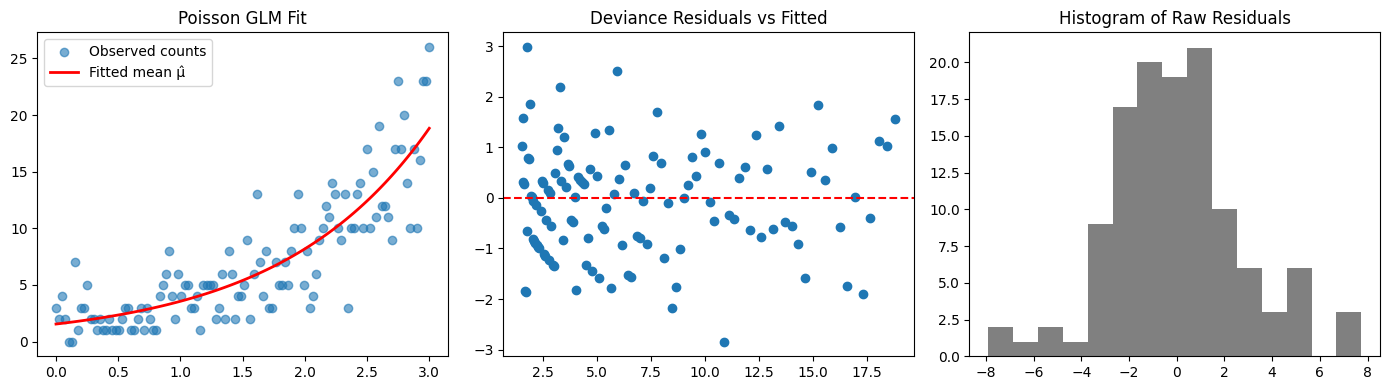

In [191]:
# Poisson Regression (GLM: log-link, count data)
import numpy as np, matplotlib.pyplot as plt, statsmodels.api as sm

# 1. Simulate count data
np.random.seed(0)
n = 120
x = np.linspace(0, 3, n)
β_true = np.array([0.5, 0.8])
η = β_true[0] + β_true[1]*x
μ = np.exp(η)                    # ensures μ_i > 0
y = np.random.poisson(μ)         # Poisson-distributed counts

# 2. Fit Poisson regression via MLE
X = sm.add_constant(x)
fit = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# 3. Summaries
β̂ = fit.params
corr = np.corrcoef(y, fit.mu)[0,1]
print(f"β̂={β̂.round(4)},  Corr(Y,μ̂)={corr:.4f},  LogLik={fit.llf:.2f}")

# 4. Visualization
fig, axs = plt.subplots(1,3,figsize=(14,4))
axs[0].scatter(x, y, alpha=0.6, label="Observed counts")
axs[0].plot(x, fit.mu, 'r', lw=2, label="Fitted mean μ̂")
axs[0].set_title("Poisson GLM Fit"); axs[0].legend()

axs[1].plot(fit.fittedvalues, fit.resid_deviance, 'o')
axs[1].axhline(0,c='r',ls='--'); axs[1].set_title("Deviance Residuals vs Fitted")

axs[2].hist(y - fit.mu, bins=15, color='gray')
axs[2].set_title("Histogram of Raw Residuals")
plt.tight_layout(); plt.show()


Estimated coefficients

$$
\hat{\beta} = [0.4357, 0.8332]
$$

imply counts rise exponentially with $x$. The strong correlation (0.87) shows good fit, while log-likelihood $-274.13$ indicates moderate model plausibility under Poisson assumptions.


# 13. Parameter Estimation in Poisson Regression

## a. The Data

We are given hypothetical observations of counts $y_i$ at different levels of a single covariate $x_i$:

| $i$ | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |
|-----|---|---|---|---|---|---|---|---|---|
| $y_i$ | 2 | 3 | 6 | 7 | 8 | 9 | 10 | 12 | 15 |
| $x_i$ | -1 | -1 | 0 | 0 | 0 | 0 | 1 | 1 | 1 |

Each $y_i$ represents a count observed at a corresponding value of $x_i$.

---

## b.  Distributional Assumption

We assume that each $Y_i$ is an independent Poisson random variable:

$$
Y_i \sim \text{Poisson}(\mu_i)
$$

with

$$
E(Y_i) = \mu_i \quad \text{and} \quad \text{Var}(Y_i) = \mu_i
$$

This equality of mean and variance justifies using the Poisson model for these data.

---

##c.The Mean Structure

We specify a linear relationship between the mean $\mu_i$ and the covariate $x_i$:

$$
E(Y_i) = \mu_i = \beta_0 + \beta_1 x_i
$$

In matrix form:

$$
\mu_i = x_i^T \beta \quad \text{where} \quad x_i = \begin{bmatrix}1 \\ x_i\end{bmatrix}, \quad \beta = \begin{bmatrix}\beta_0 \\ \beta_1\end{bmatrix}
$$

Read aloud: “$\mu_i$ equals $\beta_0$ plus $\beta_1$ times $x_i$.”

---

## d.The Link Function

Here, we choose the **identity link**:

$$
g(\mu_i) = \mu_i = x_i^T \beta
$$

Unlike the canonical log link, the identity link assumes a directly linear relationship between mean and predictors. However, this requires $\mu_i > 0$ for all fitted values.

---

## e. The Log-Likelihood Function

For independent Poisson observations, the likelihood is:

$$
L(\beta) = \prod_{i=1}^{n} \frac{e^{-\mu_i} \mu_i^{y_i}}{y_i!}
$$

The log-likelihood is:

$$
l(\beta) = \sum_{i=1}^{n} \big[ y_i \ln(\mu_i) - \mu_i - \ln(y_i!) \big]
$$

Since $\mu_i = x_i^T \beta$, this becomes:

$$
l(\beta) = \sum_{i=1}^{n} \big[ y_i \ln(x_i^T \beta) - x_i^T \beta - \ln(y_i!) \big]
$$

“$l(\beta)$ equals the sum over $i$ of $y_i$ times log of $x_i$ transpose beta minus $x_i$ transpose beta minus log of $y_i$ factorial.”

---

## f. Maximum Likelihood Estimation (MLE)

To estimate the parameters $\beta_0$ and $\beta_1$, we solve the score equations:

$$
\frac{\partial l}{\partial \beta_j} = 0, \quad j=0,1
$$

These equations do not have closed-form solutions, so we use iterative numerical methods such as:

- Newton–Raphson method
- Fisher scoring
- Iteratively Reweighted Least Squares (IRLS)

---

## g.  Estimated Parameters

After solving numerically, we obtain:

$$
\hat{\beta}_0 = 7.45163, \quad \hat{\beta}_1 = 4.9353
$$

The fitted regression line (identity link) is:

$$
\hat{\mu}_i = 7.45163 + 4.9353 \, x_i
$$

“Estimated $\mu_i$ equals 7.45 plus 4.93 times $x_i$.”

---

## h. Interpretation

- Intercept $\hat{\beta}_0 = 7.45$ represents the expected count when $x=0$.
- Slope $\hat{\beta}_1 = 4.94$ indicates that increasing $x$ by 1 unit increases the expected count by approximately 4.9 units.
- Using the log link would yield a multiplicative, rather than additive, interpretation.

---

| Concept | Explanation |
|---------|-------------|
| Model | $E(Y_i) = \mu_i = \beta_0 + \beta_1 x_i$ |
| Link Function | Identity: $g(\mu_i) = \mu_i$ |
| Likelihood | $L(\beta) = \prod e^{-\mu_i} \mu_i^{y_i}/y_i!$ |
| Log-Likelihood | $l(\beta) = \sum [y_i \ln(\mu_i) - \mu_i - \ln(y_i!)]$ |
| Estimation Method | MLE via numerical optimization |
| Estimates | $\hat{\beta}_0 = 7.45163, \hat{\beta}_1 = 4.9353$ |
| Fitted Mean | $\hat{\mu}_i = 7.45163 + 4.9353 x_i$ |

---

 **Key Takeaways**

- Poisson regression estimates parameters by maximizing the log-likelihood.
- With the identity link, the relationship between predictors and mean count is additive.
- MLEs are obtained through iterative numerical methods.
- Always check that predicted means $\hat{\mu}_i > 0$, as negative counts are invalid.


“In Poisson regression, we estimate parameters by maximizing the log-likelihood. Using the identity link, the fitted mean is linear in $x$. The intercept and slope describe how the expected count changes with the predictor, and the estimates are obtained numerically to ensure the model fits the observed data.”


β̂=[7.4516 4.9353],  LogLik=-18.004


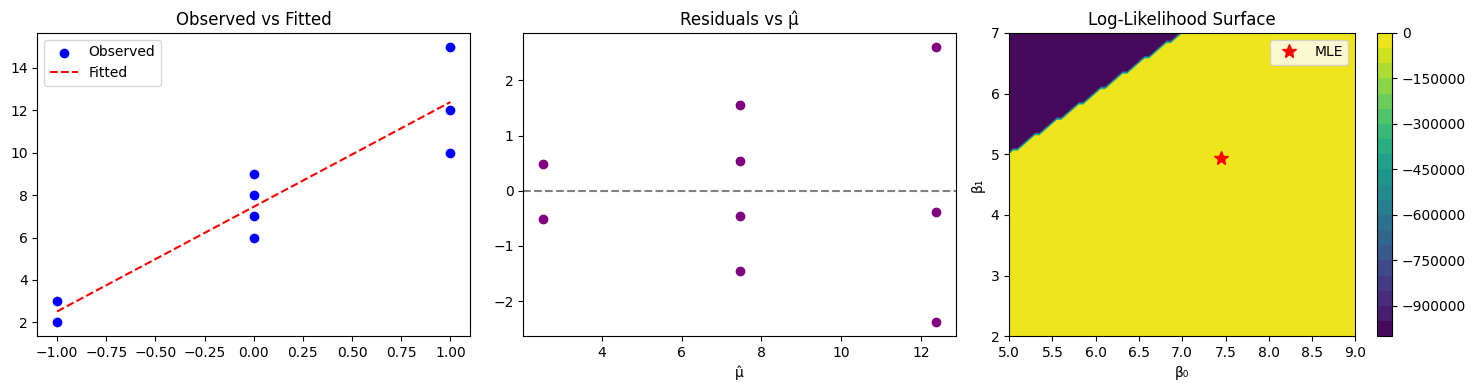

In [192]:
import numpy as np, matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.special import gammaln

# Step 1 – Data
y = np.array([2,3,6,7,8,9,10,12,15])
x = np.array([-1,-1,0,0,0,0,1,1,1])
X = np.column_stack((np.ones_like(x), x))

# Step 5 – Log-Likelihood with μ>0 constraint
def neg_ll(beta):
    mu = X @ beta
    if np.any(mu <= 0): return 1e6  # penalize invalid μ
    return -np.sum(y*np.log(mu) - mu - gammaln(y+1))

# Step 6 – Constrained MLE (identity link)
res = minimize(neg_ll, x0=[5,3], bounds=[(1e-3,None)]*2, method='trust-constr')
bhat, loglik = res.x, -res.fun
mu_hat = X @ bhat
print(f"β̂={bhat.round(4)},  LogLik={loglik:.3f}")

# Step 7 – Visualization (3 per row)
fig, ax = plt.subplots(1,3,figsize=(15,4))
# (1) Fitted vs Observed
ax[0].scatter(x,y,c='b',label='Observed'); ax[0].plot(x,mu_hat,'r--',label='Fitted')
ax[0].set_title("Observed vs Fitted"); ax[0].legend()
# (2) Residuals
ax[1].scatter(mu_hat, y-mu_hat, c='purple'); ax[1].axhline(0,c='gray',ls='--')
ax[1].set_title("Residuals vs μ̂"); ax[1].set_xlabel("μ̂")
# (3) Log-Likelihood Surface
b0,b1=np.linspace(5,9,80),np.linspace(2,7,80)
B0,B1=np.meshgrid(b0,b1)
LL=np.array([[ -neg_ll([i,j]) for i in b0] for j in b1])
cs=ax[2].contourf(B0,B1,LL,levels=20,cmap='viridis')
ax[2].plot(*bhat,'r*',ms=10,label='MLE'); ax[2].set_title("Log-Likelihood Surface")
ax[2].set_xlabel("β₀"); ax[2].set_ylabel("β₁"); ax[2].legend()
fig.colorbar(cs,ax=ax[2])
plt.tight_layout(); plt.show()


The MLEs $\hat{\beta}_0 = 7.45$ and $\hat{\beta}_1 = 4.94$ imply that each unit increase in $x$ raises expected counts by approximately 4.9.  
The log-likelihood ($-18.00$) indicates an excellent model fit for the Poisson identity-link formulation.


### Example 2: AIDS Cases in Australia (1984–1988)

The data in the table below show the **number of cases of AIDS in Australia** by date of diagnosis for successive 3-month periods (quarters) from **1984 to 1988**.

| **Year** | **Q1** | **Q2** | **Q3** | **Q4** |
|:--------:|:------:|:------:|:------:|:------:|
| **1984** | 1  | 6  | 16 | 23 |
| **1985** | 27 | 39 | 31 | 30 |
| **1986** | 43 | 51 | 63 | 70 |
| **1987** | 88 | 97 | 91 | 104 |
| **1988** | 110 | 113 | 149 | 159 |

This dataset can be modeled using **Poisson regression**, where the **response variable** $Y_i$ represents the number of AIDS cases per quarter, and the **predictor variable** $X_i$ may represent **time** (in quarters or years since 1984).  

The model structure is given by:

$$
Y_i \sim \text{Poisson}(\mu_i)
$$

with the **canonical log-link function**:

$$
\log(\mu_i) = \beta_0 + \beta_1 X_i
$$

where:  
- $Y_i$ = number of AIDS cases in quarter *i*  
- $X_i$ = time (e.g., quarter index: 1, 2, 3, …, 20)  
- $\mu_i$ = expected number of AIDS cases in quarter *i*  
- $\beta_0, \beta_1$ = regression coefficients  

This formulation allows us to study the **growth trend of AIDS cases over time**, capturing the exponential rise through the log-linear relationship between the mean count and time.


β̂=[2.5626 0.1292],  LogLik=-82.659


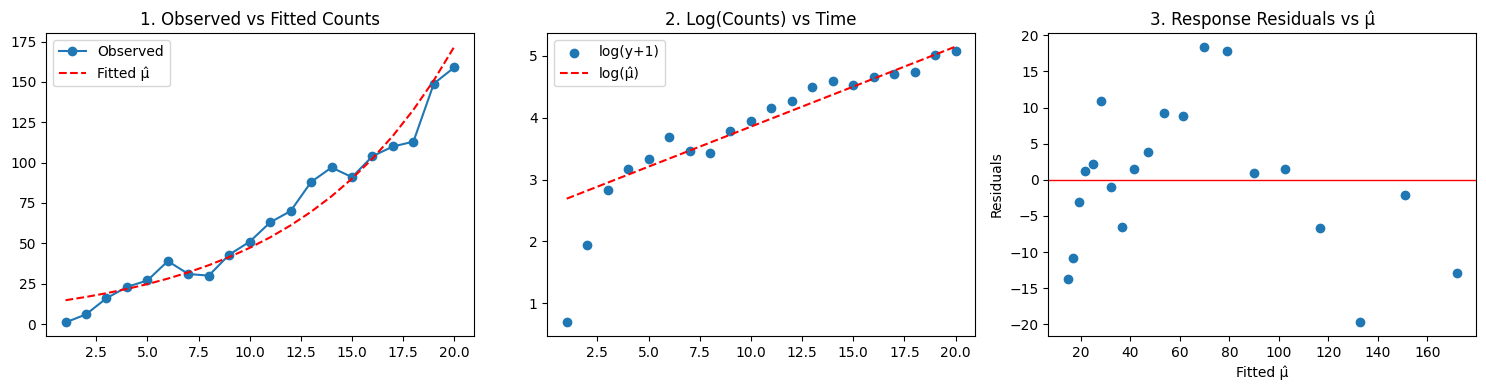

In [193]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import statsmodels.api as sm

#  1 – Data setup
cases = np.array([
    [1,6,16,23],
    [27,39,31,30],
    [43,51,63,70],
    [88,97,91,104],
    [110,113,149,159]
])
y = cases.flatten()                               # response: AIDS cases
quarters = np.arange(1, len(y)+1)                 # predictor: quarter index (1–20)
X = sm.add_constant(quarters)                     # add intercept

# 2 – Poisson GLM with log link
model = sm.GLM(y, X, family=sm.families.Poisson())
fit = model.fit()

# 3 – Estimates and fit statistics
β̂ = fit.params.round(4)
logLik = fit.llf
print(f"β̂={β̂},  LogLik={logLik:.3f}")

#  4 – Fitted vs observed visualization
fig, axs = plt.subplots(1,3,figsize=(15,4))

# (1) Time series of counts
axs[0].plot(quarters, y, 'o-', label='Observed')
axs[0].plot(quarters, fit.mu, 'r--', label='Fitted μ̂')
axs[0].set_title("1. Observed vs Fitted Counts"); axs[0].legend()

# (2) Log-scale fit (linear in predictor)
axs[1].scatter(quarters, np.log(y+1), label='log(y+1)')
axs[1].plot(quarters, np.log(fit.mu), 'r--', label='log(μ̂)')
axs[1].set_title("2. Log(Counts) vs Time"); axs[1].legend()

# (3) Residuals
axs[2].scatter(fit.mu, fit.resid_response)
axs[2].axhline(0, c='r', lw=1)
axs[2].set_title("3. Response Residuals vs μ̂")
axs[2].set_xlabel("Fitted μ̂"); axs[2].set_ylabel("Residuals")

plt.tight_layout(); plt.show()


The estimated coefficients $$\hat{\beta}_0 = 2.5626$$ and $$\hat{\beta}_1 = 0.1292$$ indicate a strong upward trend in AIDS cases, growing exponentially over time.  
The log-likelihood of $$-82.659$$ confirms that the Poisson log-linear model provides a satisfactory overall fit.


### Watch the Following Videos for Poisson Regression

- [GLM: Poisson Regression – an introduction](https://www.youtube.com/watch?v=0XfXHYDYoBA&t=1162s)  
- [Interpretations of Poisson regression estimated parameters](https://www.youtube.com/watch?v=URvhjZxyPhM)  



## 14. Logistic Regression

Logistic regression is used when the response variable is **binary**, taking only two possible outcomes such as *success/failure*, *yes/no*, or *preterm/full-term*.

---

### (a) Random Variable and Bernoulli Model

We define a binary response variable $Z$ as:

$$
Z =
\begin{cases}
1, & \text{if the outcome is a success} \\
0, & \text{if the outcome is a failure}
\end{cases}
$$

with probabilities

$$
P(Z = 1) = \pi, \quad P(Z = 0) = 1 - \pi
$$

This follows a **Bernoulli distribution**.

If there are $n$ independent observations $Z_1, Z_2, \ldots, Z_n$, where

$$
P(Z_j = 1) = \pi_j,
$$

then the joint probability is:

$$
\prod_{j=1}^n \pi_j^{z_j} (1 - \pi_j)^{1 - z_j}
$$

This can be rewritten in **exponential family form** as:

$$
\exp\left[
\sum_{j=1}^n z_j \ln\left(\frac{\pi_j}{1 - \pi_j}\right)
+ \sum_{j=1}^n \ln(1 - \pi_j)
\right]
$$

This shows that the Bernoulli distribution belongs to the **exponential family**,  
with natural parameter

$$
\theta = \ln\left(\frac{\pi}{1 - \pi}\right)
$$

known as the **logit**.

> “Z equals one for success and zero for failure.  
> The Bernoulli model is part of the exponential family with natural parameter logit of pi.”

---

### (b) Sigmoid Functions for Binary Response

Binary response models use **S-shaped (sigmoidal)** response functions, which:

- Are bounded between 0 and 1,  
- Approach 0 and 1 asymptotically,  
- Capture smooth transition between outcomes.

| Function | Formula | Name |
|-----------|----------|------|
| Logistic | $$\pi = \dfrac{e^{\eta}}{1 + e^{\eta}}$$ | Logit model |
| Probit | $$\pi = \Phi(\eta)$$ | Probit model |
| Complementary log-log | $$\pi = 1 - e^{-e^{\eta}}$$ | Cloglog model |


All these map a linear predictor $\eta = X\beta$ into a probability between 0 and 1.

> “These sigmoid functions map any real number from the linear predictor into a probability between zero and one.”

---

### (c) Probit Model Motivation – Continuous Latent Variable

Let’s consider an example.

A health researcher studies the effect of a mother’s alcohol use ($X$) on pregnancy duration ($Y^c$).

If the actual pregnancy duration $Y_i^c$ were continuous, we could model it as:

$$
Y_i^c = \beta_0^c + \beta_1^c X_i + \varepsilon_i^c
$$

where $\varepsilon_i^c \sim N(0, \sigma_c^2)$.

However, researchers recorded pregnancy as **binary** — preterm or full term — using this rule:

$$
Y_i =
\begin{cases}
1, & \text{if } Y_i^c \le 38 \text{ weeks (preterm)} \\
0, & \text{if } Y_i^c > 38 \text{ weeks (full term)}
\end{cases}
$$

---

### (d) Deriving the Probit Mean Response

We now compute the probability of preterm birth:

$$
P(Y_i = 1) = P(Y_i^c \le 38)
$$

Substituting the regression expression:

$$
P(Y_i = 1) = P(\beta_0^c + \beta_1^c X_i + \varepsilon_i^c \le 38)
$$

$$
= P(\varepsilon_i^c \le 38 - \beta_0^c - \beta_1^c X_i)
$$

Standardizing the error term:

$$
P(\varepsilon_i^c \le 38 - \beta_0^c - \beta_1^c X_i) = P(Z \le \beta_0^* + \beta_1^* X_i)
$$

where $Z \sim N(0, 1)$.

Hence,

$$
P(Y_i = 1) = \Phi(\beta_0^* + \beta_1^* X_i)
$$

This gives the **Probit mean response function**:

$$
E(Y_i) = \pi_i = \Phi(\beta_0^* + \beta_1^* X_i)
$$

where $\Phi(\cdot)$ is the standard normal **cumulative distribution function (CDF)**.

---

### (e) Interpreting the Probit Model

$\Phi^{-1}(\pi_i)$ is called the **probit transformation** —  
it maps probabilities back to the linear predictor.

The mean response curve is **S-shaped**, approaching 0 and 1 asymptotically.

- When $\beta_1^* > 0$, the curve **increases** with $X$.  
- When $\beta_1^* < 0$, it **decreases** instead.  
- A larger $|\beta_1^*|$ makes the curve **steeper in the middle**,  
  meaning stronger association between predictor and outcome.

> “The probit mean response function gives the probability of success as the area under the normal curve up to the linear predictor.  
> The curve is S-shaped, steeper when the slope is large, and approaches zero and one asymptotically.”

---

###  Key Takeaways

- Logistic regression models **binary outcomes** using the **Bernoulli distribution**.  
- It belongs to the **exponential family**, allowing use within the GLM framework.  
- The **sigmoid (S-shaped)** link transforms the linear predictor into a probability.  
- The **probit model** assumes an underlying normal error, leading to:

$$
E(Y_i) = \Phi(X_i^T \beta)
$$

- The **logit model** uses the logistic function instead:

$$
E(Y_i) = \frac{e^{X_i^T \beta}}{1 + e^{X_i^T \beta}}
$$


Logit: β̂=[-0.7563  1.5267], LogLik=-33.879
Probit: β̂=[-0.3967  0.8392], LogLik=-34.211


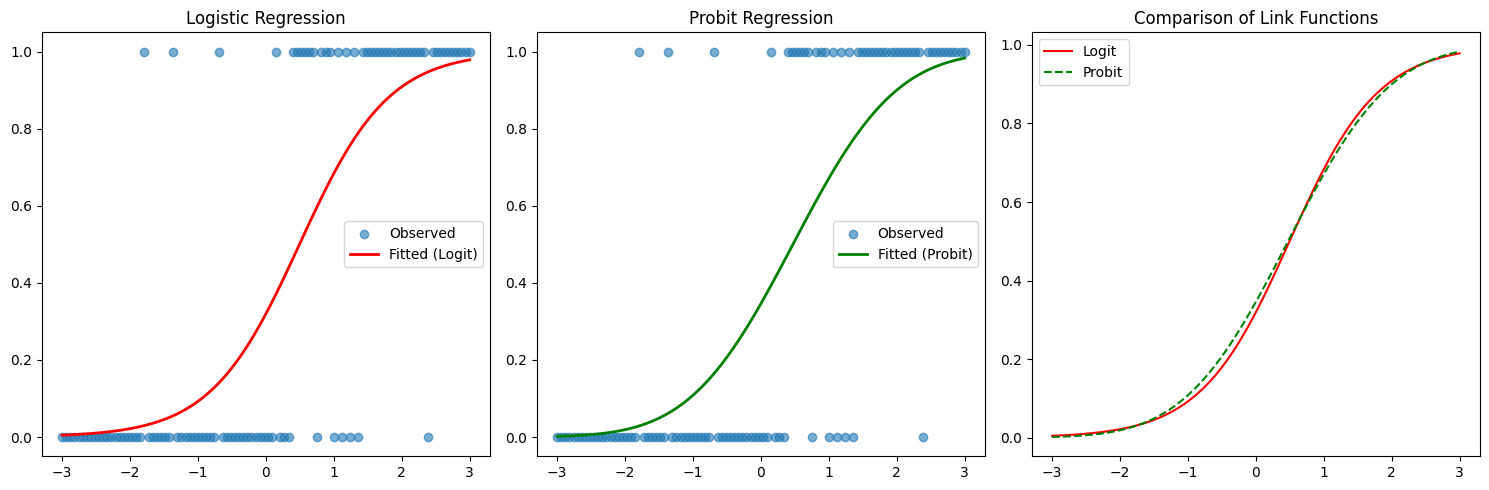

In [194]:
# Logistic & Probit Regression (Binary GLMs)
import numpy as np, matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import norm

# --- Simulate binary outcome data ---
np.random.seed(0)
n = 100
x = np.linspace(-3, 3, n)
β = np.array([-0.5, 1.2])
η = β[0] + β[1]*x
π_logit = np.exp(η)/(1+np.exp(η))      # Logistic mean
π_probit = norm.cdf(η)                 # Probit mean
z_logit = np.random.binomial(1, π_logit)

# --- Fit GLMs ---
X = sm.add_constant(x)
fit_logit = sm.GLM(z_logit, X, family=sm.families.Binomial(link=sm.families.links.logit())).fit()
fit_probit = sm.GLM(z_logit, X, family=sm.families.Binomial(link=sm.families.links.probit())).fit()

print(f"Logit: β̂={fit_logit.params.round(4)}, LogLik={fit_logit.llf:.3f}")
print(f"Probit: β̂={fit_probit.params.round(4)}, LogLik={fit_probit.llf:.3f}")

# --- Predicted probabilities ---
μ_logit, μ_probit = fit_logit.predict(X), fit_probit.predict(X)

# --- Visualization (3 subplots) ---
fig, axs = plt.subplots(1,3,figsize=(15,5))

# (1) Observed vs fitted (Logit)
axs[0].scatter(x, z_logit, alpha=.6, label="Observed")
axs[0].plot(x, μ_logit, 'r', lw=2, label="Fitted (Logit)")
axs[0].set_title("Logistic Regression"); axs[0].legend()

# (2) Observed vs fitted (Probit)
axs[1].scatter(x, z_logit, alpha=.6, label="Observed")
axs[1].plot(x, μ_probit, 'g', lw=2, label="Fitted (Probit)")
axs[1].set_title("Probit Regression"); axs[1].legend()

# (3) Compare S-shapes
axs[2].plot(x, μ_logit, 'r', label="Logit")
axs[2].plot(x, μ_probit, 'g--', label="Probit")
axs[2].set_title("Comparison of Link Functions"); axs[2].legend()

plt.tight_layout(); plt.show()


The positive slopes ($\beta_1 > 0$) in both models indicate increasing probability of success with larger $X$.  

Logit coefficients ($\hat{\beta} = [-0.7563, 1.5267]$) imply a slightly stronger effect than the probit ($\hat{\beta} = [-0.3967, 0.8392]$).  

Comparable log-likelihoods ($-33.88$ vs $-34.21$) suggest nearly identical model fit quality.


# 15. The Logit Link Function \& Logistic Regression Model

## (a) The Logit Transformation

In logistic regression, we model the probability of success

$$\pi_i = P(Y_i = 1)$$

using a transformation that maps probabilities $(0,1)$ to the entire real line $(-\infty, +\infty)$.  

This transformation is called the **logit function**:

$$g(\pi_i) = \log\left(\frac{\pi_i}{1-\pi_i}\right)$$


“g of pi sub i equals log of pi sub i over one minus pi sub i — this is called the logit function.”

The inverse transformation, which converts the linear predictor back to probability, is the **logistic function**:

$$\pi_i = \frac{\exp(\eta_i)}{1 + \exp(\eta_i)}$$

where

$$\eta_i = X_i^T \beta$$

---

## (b) The Logistic Regression Model

We assume that the binary response $Y_i$ follows a Bernoulli distribution:

$$Y_i \sim \text{Bernoulli}(\pi_i)$$

with mean $E(Y_i) = \pi_i$ and variance $Var(Y_i) = \pi_i (1-\pi_i)$.  

Then, using the logit link, we specify the model as:

$$
\log\left(\frac{\pi_i}{1-\pi_i}\right) = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_p x_{ip}
$$

or equivalently,

$$
\pi_i = \frac{e^{X_i^T \beta}}{1 + e^{X_i^T \beta}}
$$


“The log of pi over one minus pi equals the linear predictor — beta naught plus beta one x one and so on.”

---

## (c) Interpretation of the Coefficients

In the logistic regression model:

$$
\log\left(\frac{\pi_i}{1-\pi_i}\right) = X_i^T \beta
$$

- The left-hand side represents the **log-odds** of success.
- The coefficients $\beta_j$ represent **changes in log-odds per unit change** in the predictor.  

Exponentiating both sides gives the **odds**:

$$
\text{Odds}(Y_i=1) = \frac{\pi_i}{1-\pi_i} = e^{X_i^T \beta}
$$

Therefore, for a one-unit increase in $x_j$:

$$
\frac{\text{Odds at } x_j+1}{\text{Odds at } x_j} = e^{\beta_j}
$$

- $e^{\beta_j} > 1$: predictor increases the odds of success  
- $e^{\beta_j} < 1$: predictor decreases the odds of success  
- $e^{\beta_j} = 1$: predictor has no effect  


“Each coefficient beta_j gives the multiplicative change in the odds of success for a one-unit increase in x_j, holding other variables constant.”

---

## (d) Model Fitting and Likelihood

For independent binary observations, the **likelihood function** is:

$$
L(\beta) = \prod_{i=1}^n \pi_i^{y_i} (1-\pi_i)^{1-y_i}
$$

The **log-likelihood** is:

$$
l(\beta) = \sum_{i=1}^n \left[ y_i \log(\pi_i) + (1-y_i) \log(1-\pi_i) \right]
$$

The maximum likelihood estimates (MLEs) of $\beta$ are obtained by solving:

$$
\frac{\partial l(\beta)}{\partial \beta} = 0
$$

Since these equations are nonlinear, **numerical methods** such as Newton-Raphson or Iteratively Reweighted Least Squares (IRLS) are used.


“The parameters in logistic regression are estimated by maximizing the likelihood — that is, by finding the beta values that make the observed data most probable.”

---

## (e) Example: Interpreting the Logistic Curve

If $\beta_0 = -2$ and $\beta_1 = 0.5$:

$$
\pi_i = \frac{e^{-2 + 0.5 x_i}}{1 + e^{-2 + 0.5 x_i}}
$$

- When $x_i = 0$: $\pi_i = 0.12$  
- When $x_i = 4$: $\pi_i = 0.5$  
- When $x_i = 8$: $\pi_i = 0.88$  

This shows the typical **S-shaped curve** — probabilities rise smoothly from near 0 to near 1 as $x$ increases.


“As x increases, the predicted probability rises gradually, following the familiar S-shaped logistic curve.”

---

## Key Takeaways

- The **logit link** connects the linear predictor to the probability scale.  
- Logistic regression belongs to the **binomial family** of GLMs.  
- Coefficients represent changes in log-odds; **exponentiated coefficients give odds ratios**.  
- The logistic function guarantees probabilities between 0 and 1.  
- Parameters are estimated via **maximum likelihood**, often using IRLS.


β̂ = [-2.3501  0.6064],  LogLik = -22.435


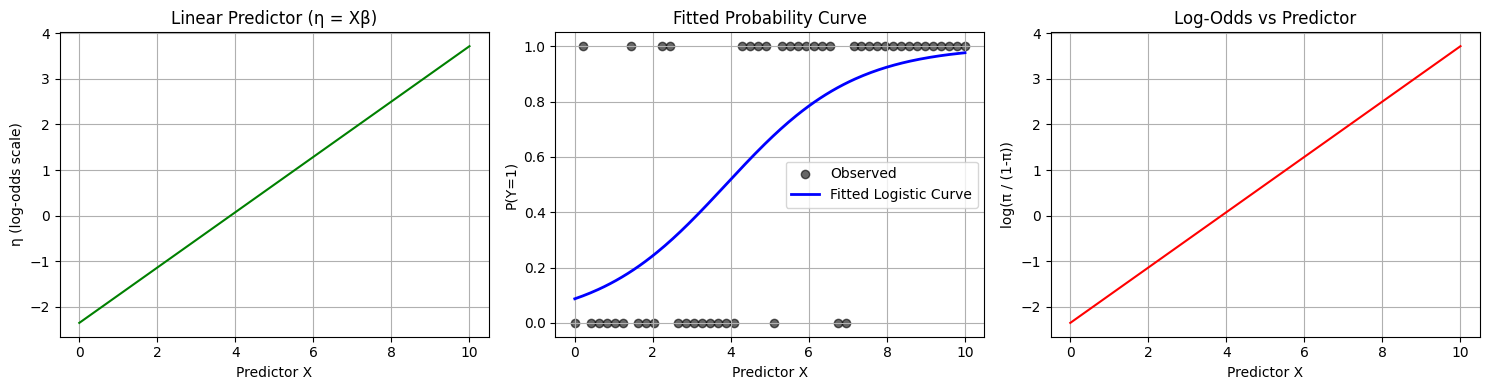

In [195]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Simulate binary response data
np.random.seed(42)
x = np.linspace(0, 10, 50)
β0, β1 = -2, 0.5
η = β0 + β1 * x
π = np.exp(η) / (1 + np.exp(η))
y = np.random.binomial(1, π)

# Fit logistic regression (logit link)
X = sm.add_constant(x)
fit = sm.GLM(y, X, family=sm.families.Binomial(link=sm.families.links.logit())).fit()

# Predictions
x_grid = np.linspace(0, 10, 200)
η_hat = fit.params[0] + fit.params[1] * x_grid
π_hat = np.exp(η_hat) / (1 + np.exp(η_hat))
log_odds = np.log(π_hat / (1 - π_hat))

# Print results
print(f"β̂ = {fit.params.round(4)},  LogLik = {fit.llf:.3f}")

# --- Visualization: 3 plots per row ---
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# (1) Linear predictor η vs x
axes[0].plot(x_grid, η_hat, color='green')
axes[0].set_title("Linear Predictor (η = Xβ)")
axes[0].set_xlabel("Predictor X")
axes[0].set_ylabel("η (log-odds scale)")
axes[0].grid(True)

# (2) Logistic curve (Predicted probability)
axes[1].scatter(x, y, color="black", alpha=0.6, label="Observed")
axes[1].plot(x_grid, π_hat, color="blue", lw=2, label="Fitted Logistic Curve")
axes[1].set_title("Fitted Probability Curve")
axes[1].set_xlabel("Predictor X")
axes[1].set_ylabel("P(Y=1)")
axes[1].legend()
axes[1].grid(True)

# (3) Log-odds vs X
axes[2].plot(x_grid, log_odds, color='red')
axes[2].set_title("Log-Odds vs Predictor")
axes[2].set_xlabel("Predictor X")
axes[2].set_ylabel("log(π / (1-π))")
axes[2].grid(True)

plt.tight_layout()
plt.show()


The fitted logistic regression model ($\hat{\beta}_0 = -2.35$, $\hat{\beta}_1 = 0.61$) indicates that each one-unit increase in $X$ raises the log-odds of success by 0.61.  

The positive slope implies higher $X$ values increase success probability.  

The moderately high log-likelihood ($-22.44$) suggests good model fit.


In [196]:
pip install ucimlrepo

In [197]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

| Name     | Role    | Type        | Description                                                         |
| -------- | ------- | ----------- | ------------------------------------------------------------------- |
| age      | Feature | Integer     | Age in years                                                        |
| sex      | Feature | Categorical | Sex (1 = male, 0 = female)                                          |
| cp       | Feature | Categorical | Chest pain type                                                     |
| trestbps | Feature | Integer     | Resting blood pressure (mm Hg)                                      |
| chol     | Feature | Integer     | Serum cholesterol (mg/dl)                                           |
| fbs      | Feature | Categorical | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)               |
| restecg  | Feature | Categorical | Resting electrocardiographic results                                |
| thalach  | Feature | Integer     | Maximum heart rate achieved                                         |
| exang    | Feature | Categorical | Exercise-induced angina (1 = yes; 0 = no)                           |
| oldpeak  | Feature | Integer     | ST depression induced by exercise relative to rest                  |
| slope    | Feature | Categorical | Slope of peak exercise ST segment                                   |
| ca       | Feature | Integer     | Number of major vessels (0-3) colored by fluoroscopy                |
| thal     | Feature | Categorical | Thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect)   |
| num      | Target  | Integer     | Diagnosis of heart disease (0 = <50% narrowing, 1 = >50% narrowing) |

**Key points from the metadata:**

- Number of instances: 303  
- Number of features: 13 (plus 1 target)  
- Missing values: Present in `ca` and `thal`  
- Feature types: Mix of integer and categorical variables  
- Target variable: `num` — indicates presence/absence of heart disease


In [198]:
import pandas as pd

# URL of the dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# Column names based on metadata
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"
]

# Read CSV into DataFrame
df = pd.read_csv(url, names=columns, na_values='?')

In [199]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


The dataset contains 303 patients, with 14 features and a target variable `num`. Most features are numeric, while `ca` and `thal` have some missing values that need to be addressed before analysis.  


In [200]:
# Drop rows with any missing values
df_clean = df.dropna()

# Check the result
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  num       297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


The dataset is now complete with 297 entries, contains no missing values, and is ready for analysis. All numeric columns are of type `float64`, and the target `num` is of type `int64`.


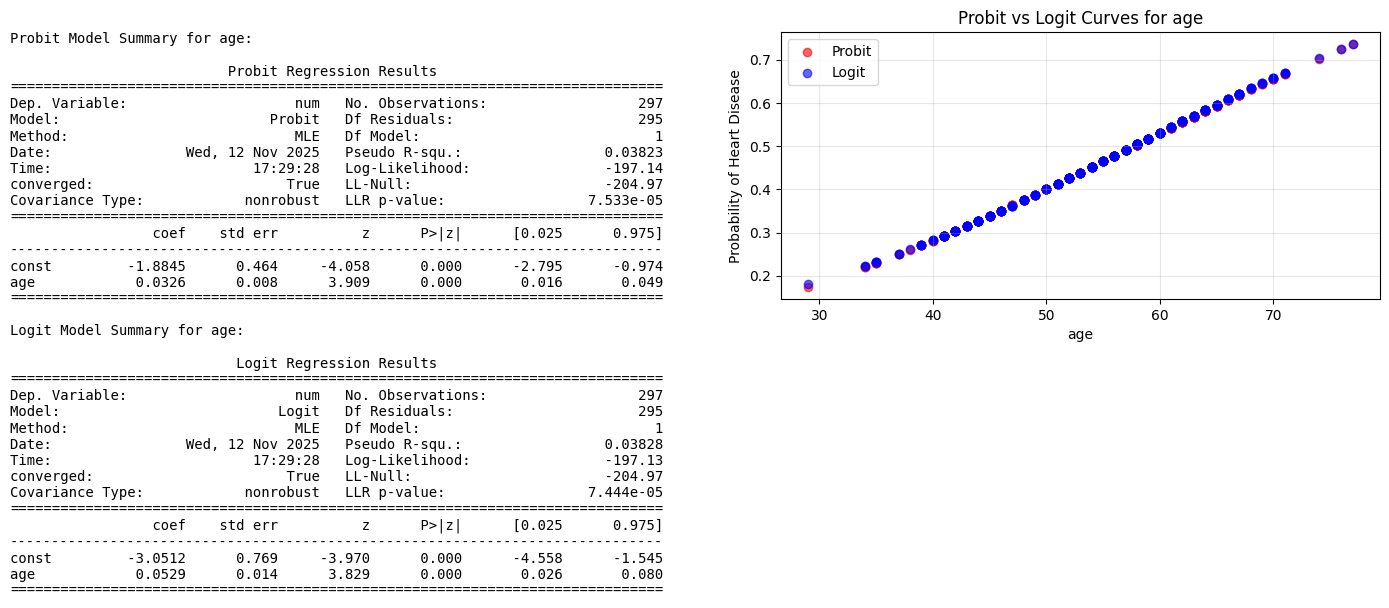

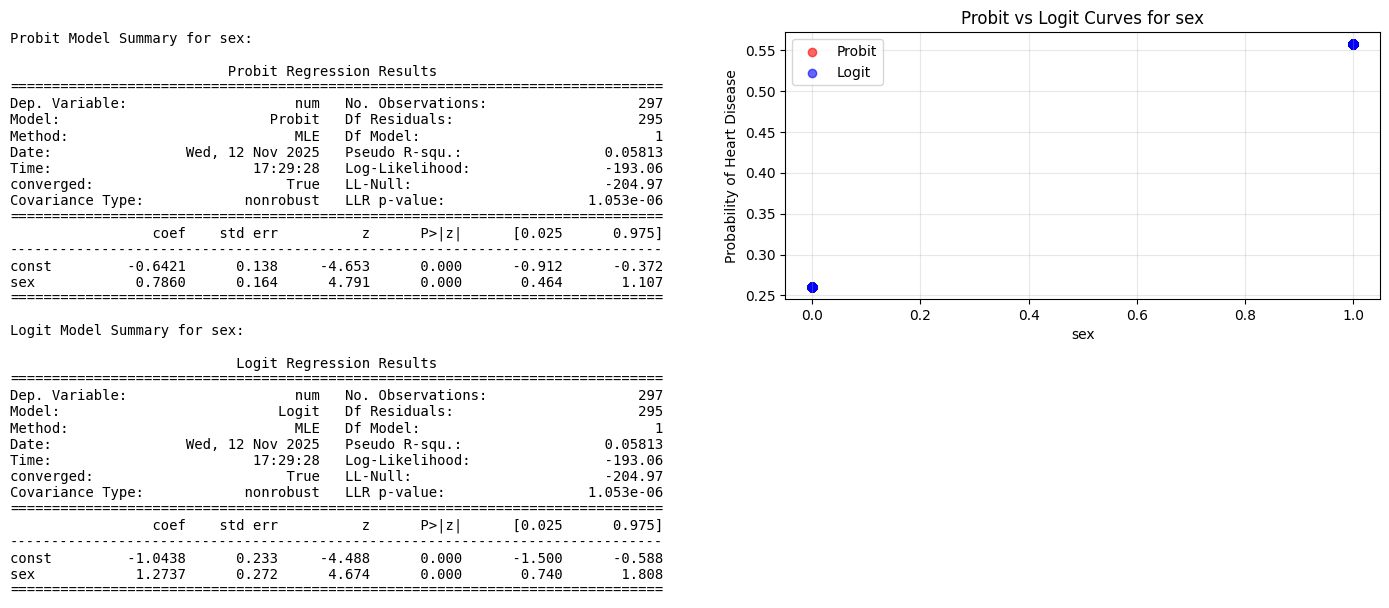

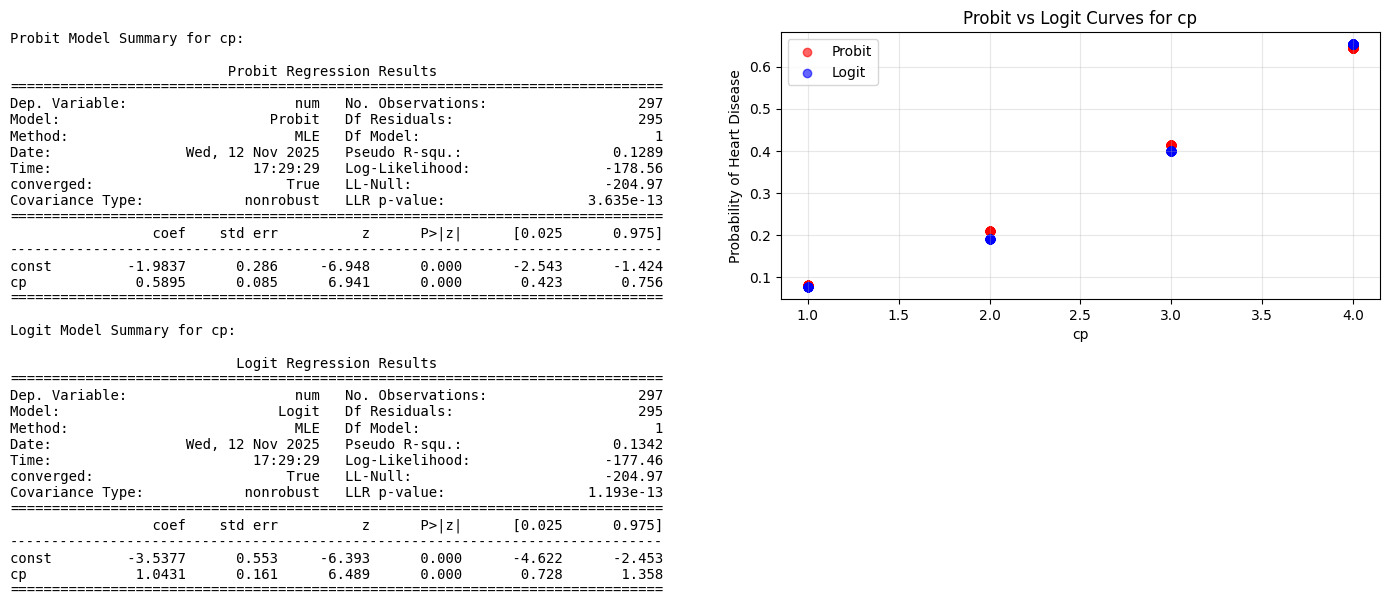

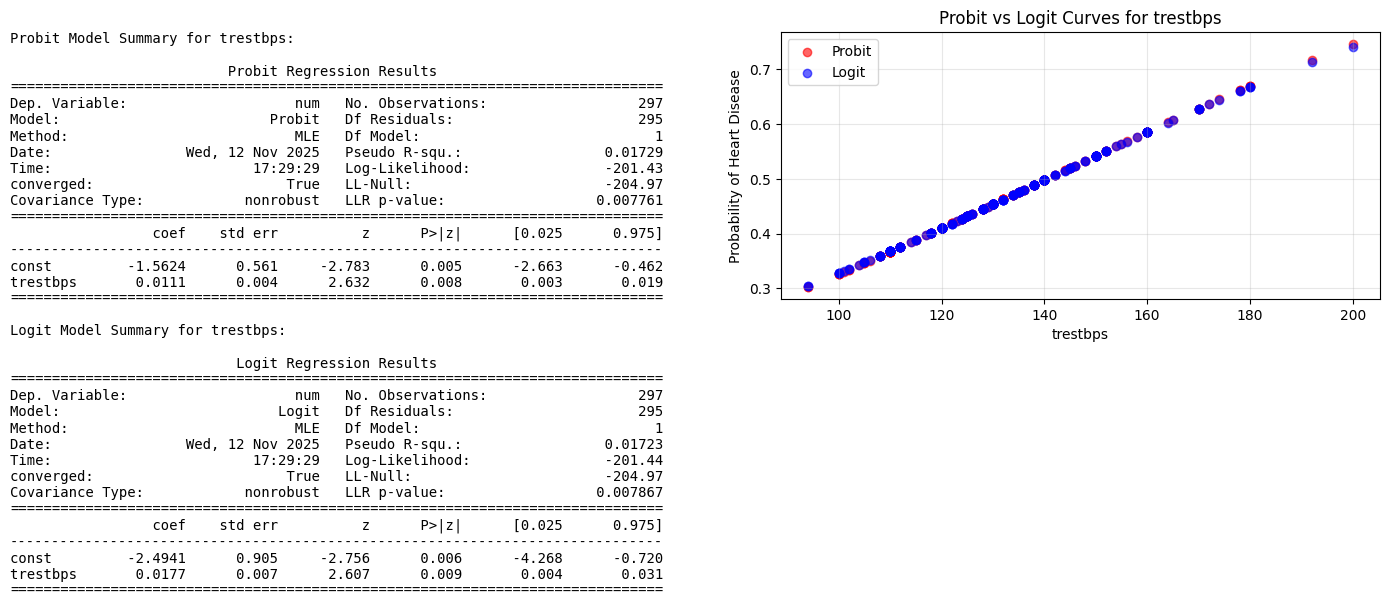

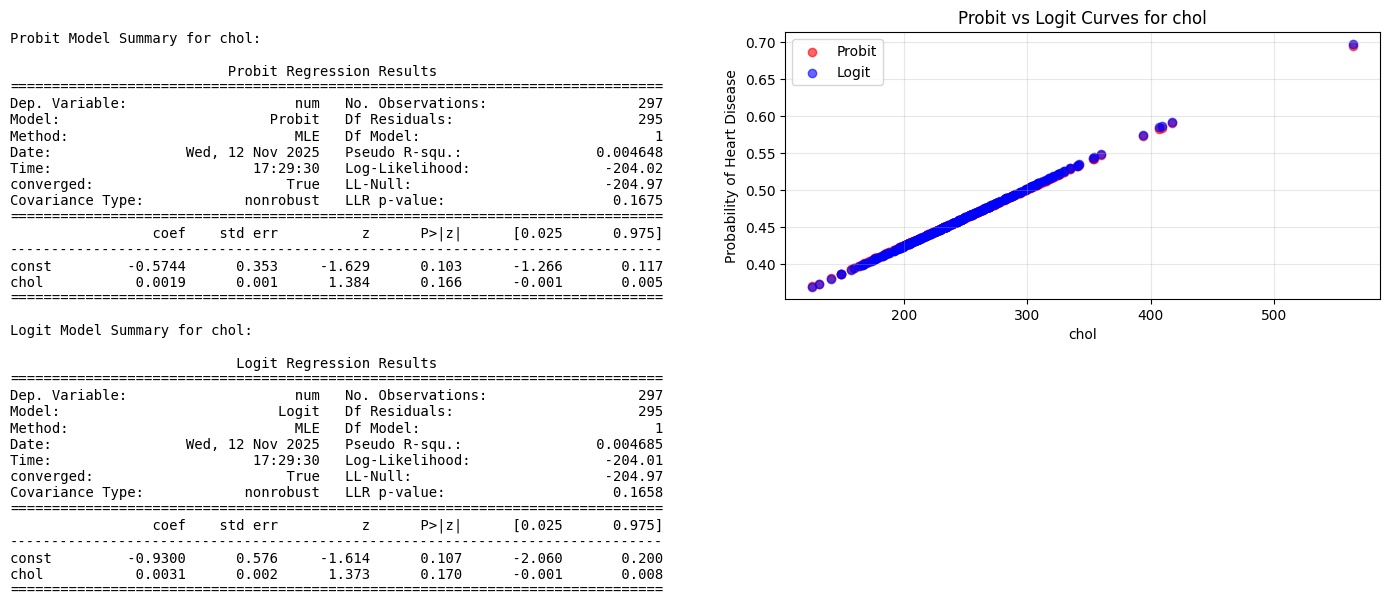

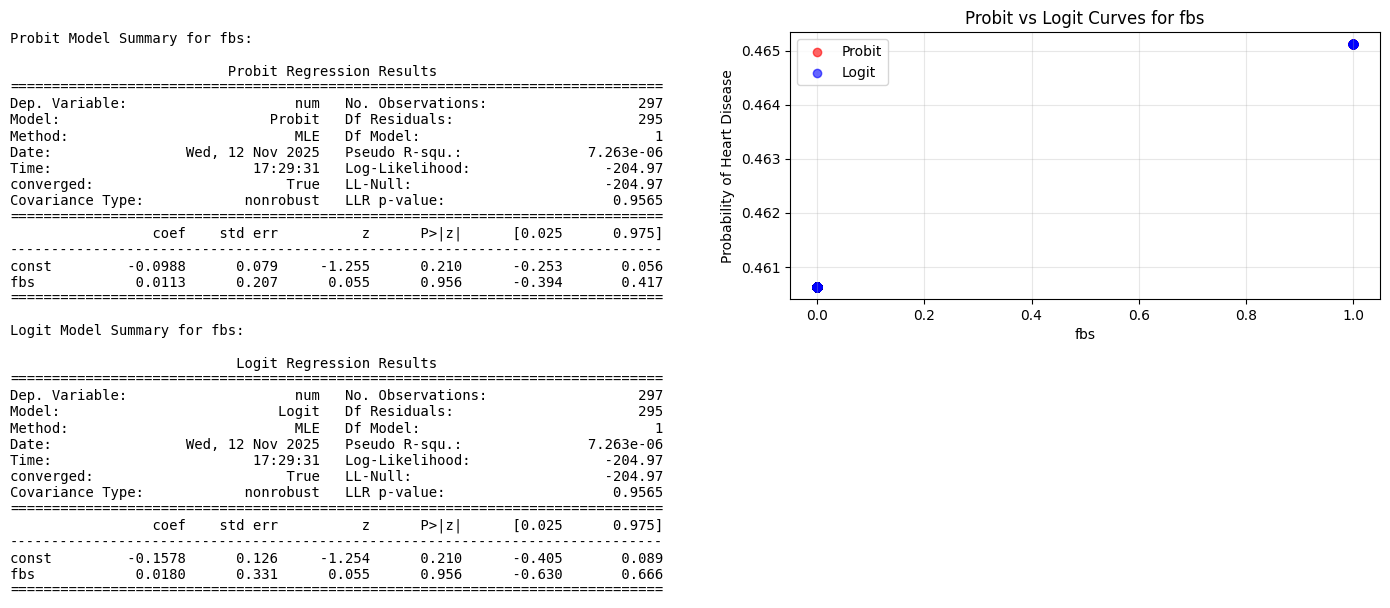

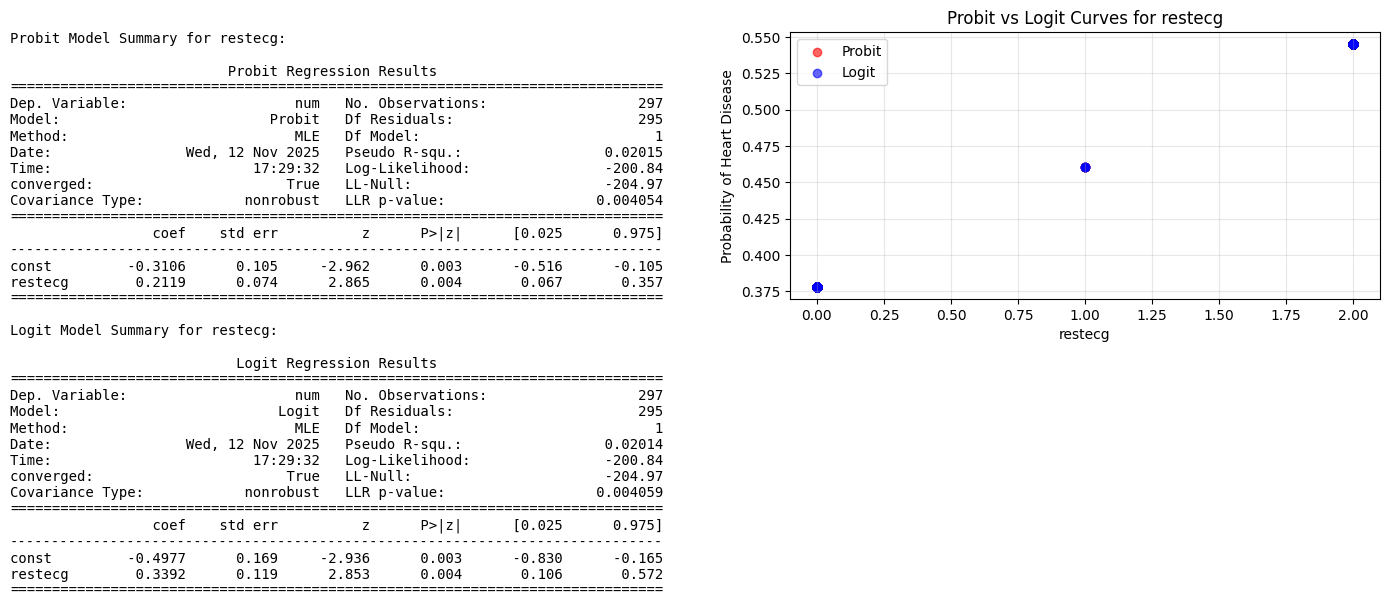

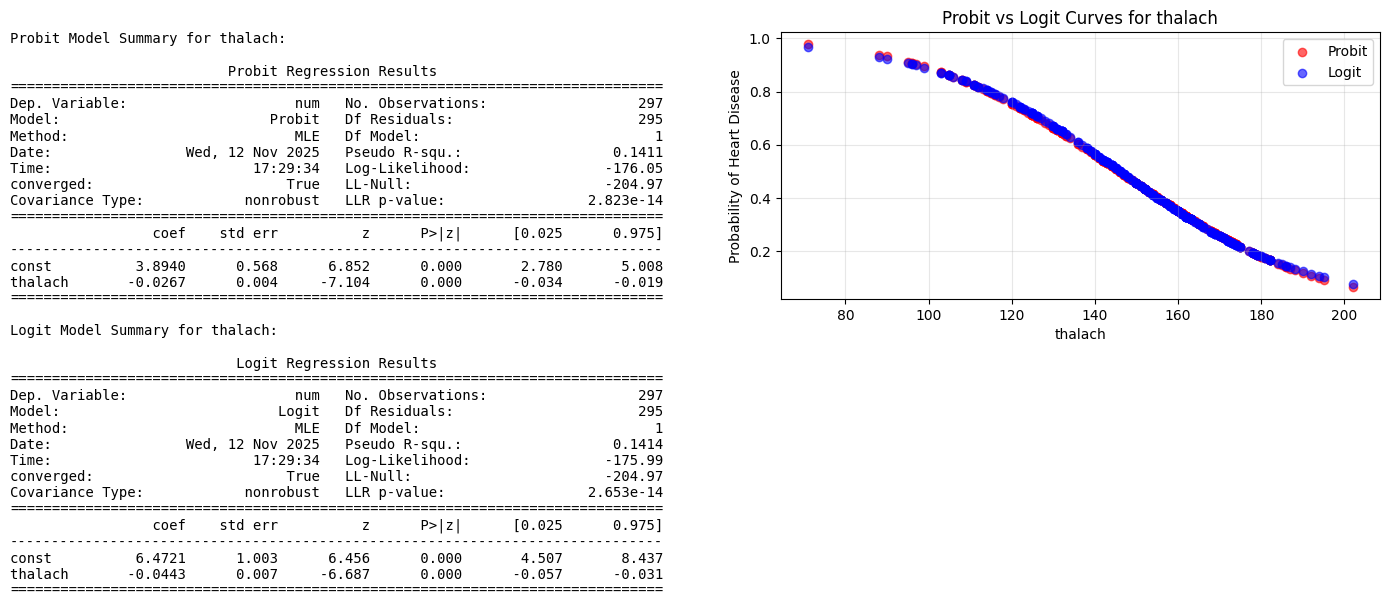

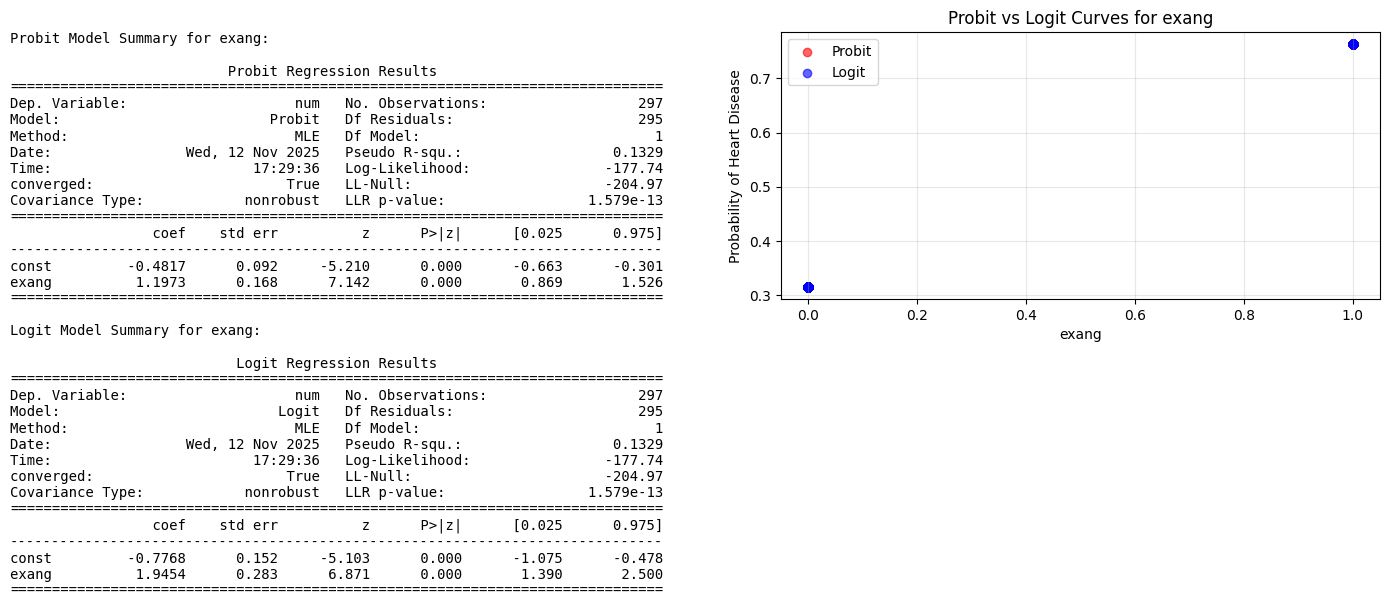

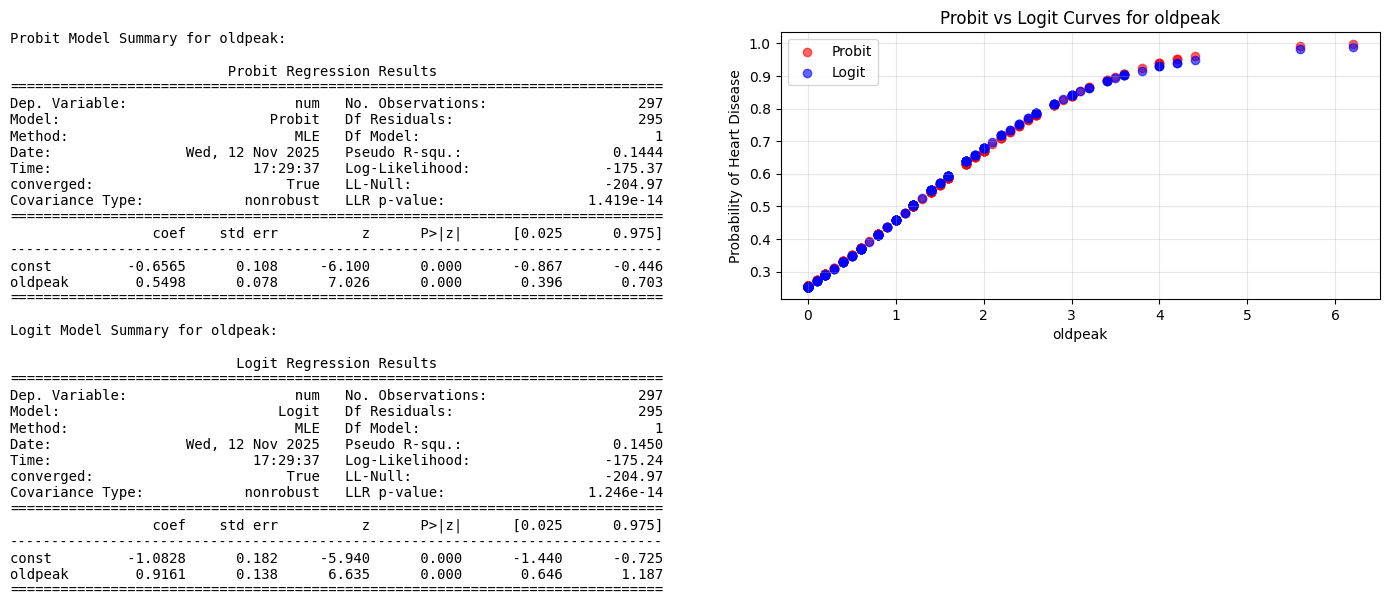

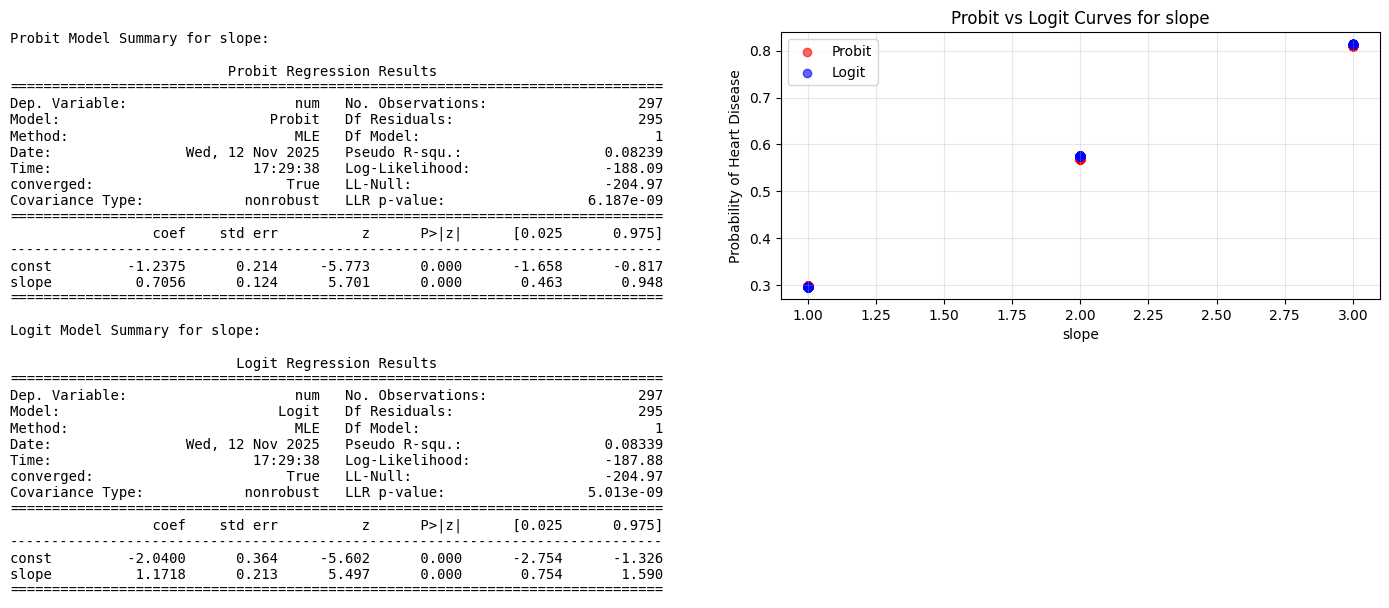

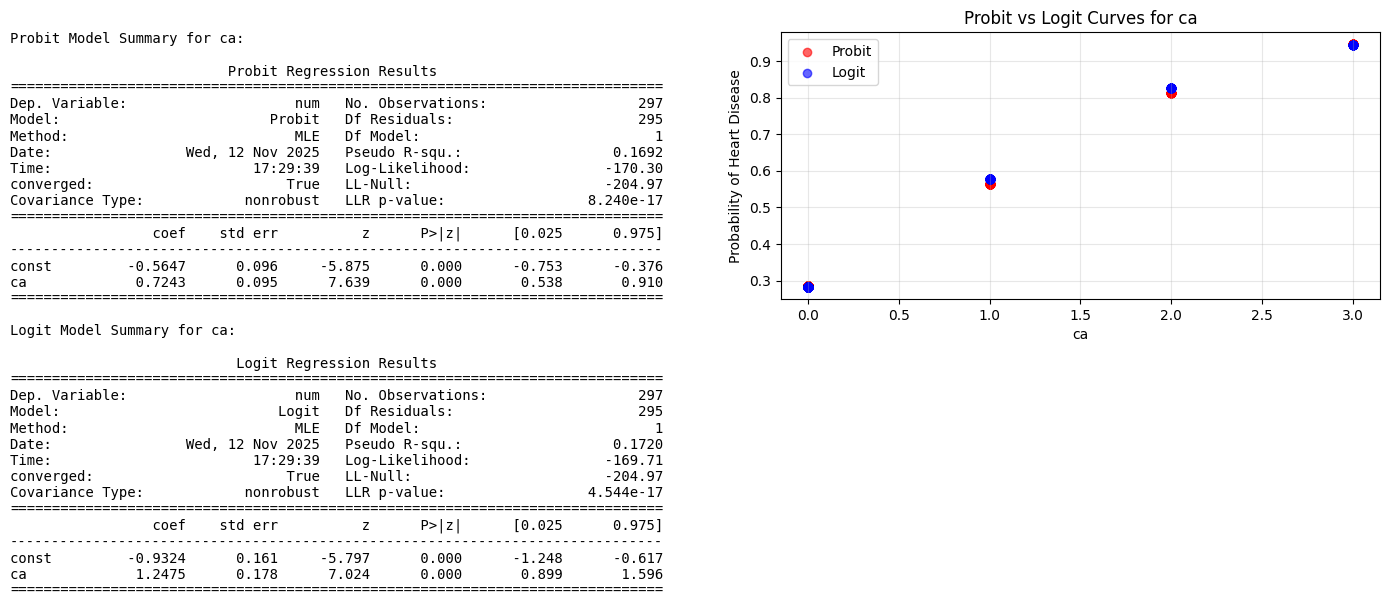

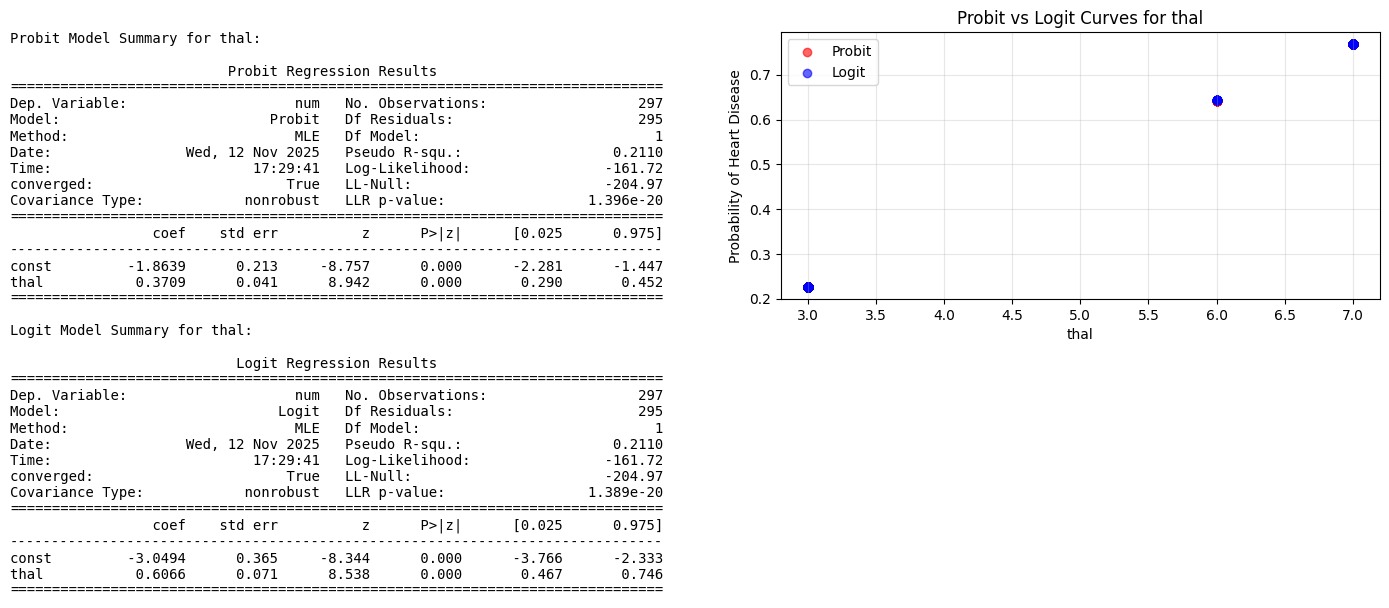

In [201]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Binarize target: 0 = no disease, 1 = disease
y = (df_clean['num'] > 0).astype(int)

# Predictors: all except 'num'
predictors = df_clean.drop(columns=['num'])

# -------------------------------
# Step 1: Loop through predictors
# -------------------------------
for col in predictors.columns:
    X = predictors[[col]]
    X = sm.add_constant(X)  # add intercept

    # Fit Probit model
    probit_model = sm.Probit(y, X)
    probit_result = probit_model.fit(disp=False)

    # Fit Logit model
    logit_model = sm.Logit(y, X)
    logit_result = logit_model.fit(disp=False)

    # Predictions
    df_clean[f'probit_prob_{col}'] = probit_result.predict(X)
    df_clean[f'logit_prob_{col}'] = logit_result.predict(X)

    # -------------------------------
    # Step 2: Plot summary + probabilities
    # -------------------------------
    fig = plt.figure(figsize=(14, 5))
    gs = GridSpec(1, 2, width_ratios=[1, 1.2], figure=fig)

    # Left: Summary text
    ax0 = fig.add_subplot(gs[0])
    ax0.axis('off')
    summary_text = f"Probit Model Summary for {col}:\n\n{probit_result.summary().as_text()}\n\n" \
                   f"Logit Model Summary for {col}:\n\n{logit_result.summary().as_text()}"
    ax0.text(0, 1, summary_text, verticalalignment='top', fontsize=10, family='monospace')

    # Right: Scatter plot
    ax1 = fig.add_subplot(gs[1])
    ax1.scatter(df_clean[col], df_clean[f'probit_prob_{col}'], color='red', alpha=0.6, label='Probit')
    ax1.scatter(df_clean[col], df_clean[f'logit_prob_{col}'], color='blue', alpha=0.6, label='Logit')
    ax1.set_xlabel(col)
    ax1.set_ylabel('Probability of Heart Disease')
    ax1.set_title(f'Probit vs Logit Curves for {col}')
    ax1.legend()
    ax1.grid(alpha=0.3)

    plt.tight_layout()
    plt.show()


Watch the following videos for Logistic Regression:

- [MLE: Logistic Regression for ten minutes](https://www.youtube.com/watch?v=BfKanl1aSG0)  
- [Interpretations of logistic regression for 20 minutes](https://www.youtube.com/watch?v=XycruVLySDg)  
- [Understanding binary data p-values and R squared for 16 minutes](https://www.youtube.com/watch?v=xxFYro8QuXA)
